#### IMPORT

In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#### 변수 목록

##### 2016 ~ 2019 모두 있는 변수만

1. 신체상에 대한 인식 변수     
- "[PR_HT]1. 평상시 자신의 건강상태가 어떻다고 생각합니까?
[1] ① 매우 건강한 편이다
[2] ② 건강한 편이다
[3] ③ 보통이다
[4] ④ 건강하지 못한 편이다
[5] ⑤ 매우 건강하지 못한 편이다"        

- "[PR_BI]2. 자신의 체형이 어떻다고 생각합니까?
[1] ① 매우 마른 편이다
[2] ② 약간 마른 편이다
[3] ③ 보통이다
[4] ④ 약간 살이 찐 편이다
[5] ⑤ 매우 살이 찐 편이다"      

- "[WC_MN]17. 최근 30일 동안, 체중을 조절하기 위해 노력한 적이 있습니까?
[1] ① 최근 30일 동안 체중을 조절하기 위해 별다른 노력을 하지 않았다 
[2] ② 최근 30일 동안 체중을 줄이기 위해 노력했다 
[3] ③ 최근 30일 동안 체중을 늘리기 위해 노력했다 
[4] ④ 최근 30일 동안 현재 체중을 유지하기 위해 노력했다"


</br>                         
                                             

2. 우울에 관한 변수        
- "[M_STR]31. 평상시 스트레스를 얼마나 느끼고 있습니까?
[1] ① 대단히 많이 느낀다 
[2] ② 많이 느낀다   
[3] ③ 조금 느낀다   
[4] ④ 별로 느끼지 않는다 
[5] ⑤ 전혀 느끼지 않는다 "             

- "[M_SAD]35. 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"

- "[M_SUI_CON]36. 최근 12개월 동안, 심각하게 자살을 생각한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_PLN]37. 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_ATT]25. 최근 12개월 동안, 자살을 시도한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"  

- "[V_TRT]53. 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 있습니까?
[1] ① 0번
[2] ② 1번
[3] ③ 2번
[4] ④ 3번
[5] ⑤ 4번
[6] ⑥ 5번
[7] ⑦ 6번 이상 "








##### 2017 ~ 2020 모두 있는 변수만

1. 신체상에 대한 인식 변수    
- "[PR_HT]1. 평상시 자신의 건강상태가 어떻다고 생각합니까?
[1] ① 매우 건강한 편이다
[2] ② 건강한 편이다
[3] ③ 보통이다
[4] ④ 건강하지 못한 편이다
[5] ⑤ 매우 건강하지 못한 편이다"           

- "[PR_BI]2. 자신의 체형이 어떻다고 생각합니까?
[1] ① 매우 마른 편이다
[2] ② 약간 마른 편이다
[3] ③ 보통이다
[4] ④ 약간 살이 찐 편이다
[5] ⑤ 매우 살이 찐 편이다"             

- "[WC_MN]17. 최근 30일 동안, 체중을 조절하기 위해 노력한 적이 있습니까?
[1] ① 최근 30일 동안 체중을 조절하기 위해 별다른 노력을 하지 않았다 
[2] ② 최근 30일 동안 체중을 줄이기 위해 노력했다 
[3] ③ 최근 30일 동안 체중을 늘리기 위해 노력했다 
[4] ④ 최근 30일 동안 현재 체중을 유지하기 위해 노력했다"



</br>



2. 우울에 관한 변수   
- "[M_STR]31. 평상시 스트레스를 얼마나 느끼고 있습니까?
[1] ① 대단히 많이 느낀다 
[2] ② 많이 느낀다   
[3] ③ 조금 느낀다   
[4] ④ 별로 느끼지 않는다 
[5] ⑤ 전혀 느끼지 않는다 "             

- "[M_SAD]35. 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"

- "[M_SUI_CON]36. 최근 12개월 동안, 심각하게 자살을 생각한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_PLN]37. 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_ATT]25. 최근 12개월 동안, 자살을 시도한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[V_TRT]53. 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 있습니까?
[1] ① 0번
[2] ② 1번
[3] ③ 2번
[4] ④ 3번
[5] ⑤ 4번
[6] ⑥ 5번
[7] ⑦ 6번 이상 "







In [ ]:
# ['PR_HT', 'PR_BI', 'WC_MN'] # 신체인식
# ['M_STR', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT', 'V_TRT'] # 우울

In [ ]:
# 불러오는 데 25분 정도 걸림

data = pd.read_excel('D:\\SNUlab\\0. data\\질병관리청_청소년건강행태조사\\2014_2020 combined.xlsx')
data

In [3]:
data2 = pd.read_csv('D:\\SNUlab\\0. data\\질병관리청_청소년건강행태조사\\c_health_1420.csv', encoding = 'cp949', low_memory = False)
data2

,OBS,mod_d,YEAR,CITY,CTYPE,CTYPE_SD,MH,SCHOOL,STYPE,STRATA,...,E_FAS1_COM,E_FAS1_BATH,E_FAS1_AIR,AC_AD,AC_POP,COVID_PA,COVID_BR,COVID_AC,COVID_TC,COVID_M
0,A100001,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A100002,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A100003,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A100004,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A100005,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495041,A154844,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,1.0,1.0,2.0,2.0,1.0,NaN,2.0
495042,A154845,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,2.0,1.0,4.0,3.0,3.0,3.0,3.0
495043,A154846,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,1.0,2.0,5.0,5.0,5.0,5.0,5.0
495044,A154847,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,1.0,1.0,1.0,3.0,3.0,3.0,3.0


In [4]:
df = data2.copy()

In [5]:
df['CITY'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '세종'], dtype=object)

In [6]:
df['CTYPE'].unique()

array(['대도시', '군지역', '중소도시'], dtype=object)

In [7]:
# 16-19, 17-20 각각 추출 후 df 생성

df1619 = df.loc[(df['YEAR'] >= 2016) & (df['YEAR'] <= 2019)].reset_index(drop = True)
df1720 = df.loc[(df['YEAR'] >= 2017) & (df['YEAR'] <= 2020)].reset_index(drop = True)

# 필요한 열만 추출

df1619 = df1619[['OBS', 'YEAR', 'CITY', 'PR_HT', 'PR_BI', 'WC_MN', 'M_STR', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT', 'V_TRT']]
df1720 = df1720[['OBS', 'YEAR', 'CITY', 'PR_HT', 'PR_BI', 'WC_MN', 'M_STR', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT', 'V_TRT']]

In [9]:
df1619.groupby('YEAR').count()

,OBS,CITY,PR_HT,PR_BI,WC_MN,M_STR,M_SAD,M_SUI_CON,M_SUI_PLN,M_SUI_ATT,V_TRT
YEAR,,,,,,,,,,,
2016,65528,65528,65528,65528,65528,65528,65528,65528,65528,65528,65528
2017,62276,62276,62276,62276,62276,62276,62276,62276,62276,62276,62276
2018,60040,60040,60040,60040,60040,60040,60040,60040,60040,60040,60040
2019,57303,57303,57303,57303,57303,57303,57303,57303,57303,57303,57303


In [10]:
df1619.describe()

,YEAR,PR_HT,PR_BI,WC_MN,M_STR,M_SAD,M_SUI_CON,M_SUI_PLN,M_SUI_ATT,V_TRT
count,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000
mean,2017.445113,2.078251,3.157799,1.834410,2.738573,1.262630,1.126059,1.041004,1.027608,1.060641
std,1.117628,0.879302,0.969760,1.002546,0.976676,0.440064,0.331917,0.198300,0.163847,0.470346
min,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2016.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2017.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2018.000000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,2019.000000,5.000000,5.000000,4.000000,5.000000,2.000000,2.000000,2.000000,2.000000,7.000000


In [11]:
df1720.describe()

,YEAR,PR_HT,PR_BI,WC_MN,M_STR,M_SAD,M_SUI_CON,M_SUI_PLN,M_SUI_ATT,V_TRT
count,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000
mean,2018.447305,2.085106,3.165330,1.849506,2.752229,1.262987,1.123790,1.039950,1.027110,1.054002
std,1.116567,0.889546,0.970176,1.000696,0.973758,0.440256,0.329342,0.195843,0.162403,0.444199
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2018.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2019.000000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,2020.000000,5.000000,5.000000,4.000000,5.000000,2.000000,2.000000,2.000000,2.000000,7.000000


In [12]:
# '신체상에 관한 인식' 변수 3개 -> 1개로 만들기 (16-19)

# 건강하다고 생각하는 군 - body_new == 1
    # 평상시 건강상태 '매우 건강' or '건강' or '보통' 이라고 생각
    # 자신의 체형 '약간 마른 편' or '보통' or '약간 살찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '별다른 노력을 하지 않음' or '현재 체중을 유지하기 위해 노력'
df1619.loc[((df1619['PR_HT'] == 1) | (df1619['PR_HT'] == 2) | (df1619['PR_HT'] == 3)) & ((df1619['PR_BI'] == 2) | (df1619['PR_BI'] == 3) | (df1619['PR_BI'] == 4)) & ((df1619['WC_MN'] == 1) | (df1619['WC_MN'] == 4)), 'body_new'] = 1

# 건강하지 않다고 생각하는 군 - body_new == 2
    # 평상시 건강상태 '건강하지 못한 편' or '매우 건강하지 못한 편' 이라고 생각
    # 자신의 체형 '매우 마른 편' or '매우 살이 찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '줄이기 위해 노력' or '늘리기 위해 노력'
df1619.loc[((df1619['PR_HT'] == 4) | (df1619['PR_HT'] == 5)) & ((df1619['PR_BI'] == 1) | (df1619['PR_BI'] == 5)) & ((df1619['WC_MN'] == 2) | (df1619['WC_MN'] == 3)), 'body_new'] = 2


In [13]:
# '신체상에 관한 인식' 변수 3개 -> 1개로 만들기 (17-20)

# 건강하다고 생각하는 군 - body_new == 1
    # 평상시 건강상태 '매우 건강' or '건강' or '보통' 이라고 생각
    # 자신의 체형 '약간 마른 편' or '보통' or '약간 살찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '별다른 노력을 하지 않음' or '현재 체중을 유지하기 위해 노력'
df1720.loc[((df1720['PR_HT'] == 1) | (df1720['PR_HT'] == 2) | (df1720['PR_HT'] == 3)) & ((df1720['PR_BI'] == 2) | (df1720['PR_BI'] == 3) | (df1720['PR_BI'] == 4)) & ((df1720['WC_MN'] == 1) | (df1720['WC_MN'] == 4)), 'body_new'] = 1

# 건강하지 않다고 생각하는 군 - body_new == 2
    # 평상시 건강상태 '건강하지 못한 편' or '매우 건강하지 못한 편' 이라고 생각
    # 자신의 체형 '매우 마른 편' or '매우 살이 찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '줄이기 위해 노력' or '늘리기 위해 노력'
df1720.loc[((df1720['PR_HT'] == 4) | (df1720['PR_HT'] == 5)) & ((df1720['PR_BI'] == 1) | (df1720['PR_BI'] == 5)) & ((df1720['WC_MN'] == 2) | (df1720['WC_MN'] == 3)), 'body_new'] = 2


In [14]:
df1619['body_new'].value_counts()

1.0    125981
2.0      1894
Name: body_new, dtype: int64

In [15]:
df1720['body_new'].value_counts()

1.0    117641
2.0      1992
Name: body_new, dtype: int64

In [16]:
# '우울' 관련 변수 6개 -> 1개로 만들기 (16-19)

# 우울을 느끼지 않는 군 - depression == 1
    # 평상시 스트레스를 '조금 느낀다' or '별로 느끼지 않는다' or '전혀 느끼지 않는다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '없다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '없다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '없다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '없다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '0번' 
df1619.loc[((df1619['M_STR'] == 3) | (df1619['M_STR'] == 4) | (df1619['M_STR'] == 5)) & (df1619['M_SAD'] == 1) & (df1619['M_SUI_CON'] == 1) & (df1619['M_SUI_PLN'] == 1) & (df1619['M_SUI_ATT'] == 1) & (df1619['V_TRT'] == 1), 'depression'] = 1

# 우울을 느끼는 군 - depression == 2
    # 평상시 스트레스를 '대단히 많이 느낀다' or '많이 느낀다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '있다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '있다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '있다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '있다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '1번 이상'
df1619.loc[((df1619['M_STR'] == 1) | (df1619['M_STR'] == 2)) & (df1619['M_SAD'] == 2) & (df1619['M_SUI_CON'] == 2) & (df1619['M_SUI_PLN'] == 2) & (df1619['M_SUI_ATT'] == 2) & (df1619['V_TRT'] >= 2), 'depression'] = 2

In [17]:
# '우울' 관련 변수 6개 -> 1개로 만들기 (17-20)

# 우울을 느끼지 않는 군 - depression == 1
    # 평상시 스트레스를 '조금 느낀다' or '별로 느끼지 않는다' or '전혀 느끼지 않는다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '없다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '없다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '없다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '없다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '0번' 
df1720.loc[((df1720['M_STR'] == 3) | (df1720['M_STR'] == 4) | (df1720['M_STR'] == 5)) & (df1720['M_SAD'] == 1) & (df1720['M_SUI_CON'] == 1) & (df1720['M_SUI_PLN'] == 1) & (df1720['M_SUI_ATT'] == 1) & (df1720['V_TRT'] == 1), 'depression'] = 1

# 우울을 느끼는 군 - depression == 2
    # 평상시 스트레스를 '대단히 많이 느낀다' or '많이 느낀다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '있다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '있다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '있다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '있다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '1번 이상'
df1720.loc[((df1720['M_STR'] == 1) | (df1720['M_STR'] == 2)) & (df1720['M_SAD'] == 2) & (df1720['M_SUI_CON'] == 2) & (df1720['M_SUI_PLN'] == 2) & (df1720['M_SUI_ATT'] == 2) & (df1720['V_TRT'] >= 2), 'depression'] = 2

In [18]:
df1619['depression'].value_counts()

1.0    124718
2.0       461
Name: depression, dtype: int64

In [19]:
df1720['depression'].value_counts()

1.0    120807
2.0       416
Name: depression, dtype: int64

In [20]:
df1619_bodydep = df1619[['YEAR', 'body_new', 'depression']]
df1720_bodydep = df1720[['YEAR', 'body_new', 'depression']]

In [21]:
df1619_bodydep_mean = pd.DataFrame(df1619_bodydep.groupby('YEAR').mean())
df1720_bodydep_mean = pd.DataFrame(df1720_bodydep.groupby('YEAR').mean())

In [22]:
df1619_bodydep_mean

,body_new,depression
YEAR,,
2016,1.012743,1.003134
2017,1.014431,1.003408
2018,1.015302,1.004152
2019,1.017215,1.004160


In [23]:
df1720_bodydep_mean

,body_new,depression
YEAR,,
2017,1.014431,1.003408
2018,1.015302,1.004152
2019,1.017215,1.004160
2020,1.020222,1.002054


cov matrix

In [48]:
# body_new
body_new_16 = df1619.loc[df1619['YEAR'] == 2016, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_17 = df1619.loc[df1619['YEAR'] == 2017, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_18 = df1619.loc[df1619['YEAR'] == 2018, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_19 = df1619.loc[df1619['YEAR'] == 2019, 'body_new'].dropna().reset_index(drop = True).tolist()

print(len(body_new_16))
print(len(body_new_17))
print(len(body_new_18))
print(len(body_new_19))

# 가장 적은 body_new_19에 맞춰서 랜덤샘플링

import random

body_new_16_sample = random.choices(body_new_16, k=len(body_new_19))
body_new_17_sample = random.choices(body_new_17, k=len(body_new_19))
body_new_18_sample = random.choices(body_new_18, k=len(body_new_19))

print(len(body_new_16_sample))
print(len(body_new_17_sample))
print(len(body_new_18_sample))
print(len(body_new_19))

x = [sum(body_new_16_sample), sum(body_new_17_sample), sum(body_new_18_sample), sum(body_new_19)]

35391
32362
30846
29276
29276
29276
29276
29276


In [50]:
x

[29664.0, 29675.0, 29712.0, 29780.0]

In [52]:
np.cov(x, x)

array([[2741.58333333, 2741.58333333],
       [2741.58333333, 2741.58333333]])

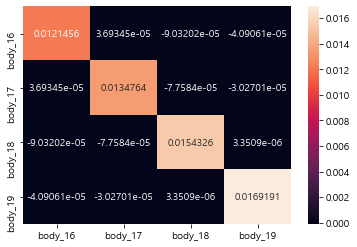

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['body_16', 'body_17', 'body_18', 'body_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [31]:
# body_new 17-20
body_new_17 = df1720.loc[df1720['YEAR'] == 2017, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_18 = df1720.loc[df1720['YEAR'] == 2018, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_19 = df1720.loc[df1720['YEAR'] == 2019, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_20 = df1720.loc[df1720['YEAR'] == 2020, 'body_new'].dropna().reset_index(drop = True).tolist()

print(len(body_new_17))
print(len(body_new_18))
print(len(body_new_19))
print(len(body_new_20))

# 가장 적은 body_new_20에 맞춰서 랜덤샘플링

import random

body_new_17_sample = random.choices(body_new_17, k=len(body_new_20))
body_new_18_sample = random.choices(body_new_18, k=len(body_new_20))
body_new_19_sample = random.choices(body_new_19, k=len(body_new_20))

print(len(body_new_17_sample))
print(len(body_new_18_sample))
print(len(body_new_19_sample))
print(len(body_new_20))

x = [body_new_17_sample, body_new_18_sample, body_new_19_sample, body_new_20]

In [36]:
np.cov(x)

array([[ 1.35149107e-02, -7.47366783e-05, -4.64818071e-05,
        -9.29161270e-05],
       [-7.47366783e-05,  1.59447835e-02, -5.18098685e-05,
         4.06083215e-05],
       [-4.64818071e-05, -5.18098685e-05,  1.65502911e-02,
        -8.88959982e-06],
       [-9.29161270e-05,  4.06083215e-05, -8.88959982e-06,
         1.98135504e-02]])

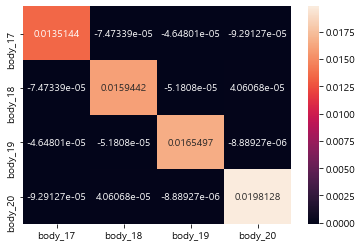

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['body_17', 'body_18', 'body_19', 'body_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [39]:
# depression 16-19
depression_16 = df1619.loc[df1619['YEAR'] == 2016, 'depression'].dropna().reset_index(drop = True).tolist()
depression_17 = df1619.loc[df1619['YEAR'] == 2017, 'depression'].dropna().reset_index(drop = True).tolist()
depression_18 = df1619.loc[df1619['YEAR'] == 2018, 'depression'].dropna().reset_index(drop = True).tolist()
depression_19 = df1619.loc[df1619['YEAR'] == 2019, 'depression'].dropna().reset_index(drop = True).tolist()

print(len(depression_16))
print(len(depression_17))
print(len(depression_18))
print(len(depression_19))

# 가장 적은 depression_19 맞춰서 랜덤샘플링

import random

depression_16_sample = random.choices(depression_16, k=len(depression_19))
depression_17_sample = random.choices(depression_17, k=len(depression_19))
depression_18_sample = random.choices(depression_18, k=len(depression_19))

print(len(depression_16_sample))
print(len(depression_17_sample))
print(len(depression_18_sample))
print(len(depression_19))

x = [depression_16_sample, depression_17_sample, depression_18_sample, depression_19]

34139
32573
30103
28364
28364
28364
28364
28364


In [40]:
np.cov(x)

array([[ 3.09300772e-03,  2.44279551e-05,  2.56312047e-05,
         2.23496150e-05],
       [ 2.44279551e-05,  3.47828003e-03, -1.08292461e-05,
        -1.45210346e-05],
       [ 2.56312047e-05, -1.08292461e-05,  3.09300772e-03,
        -1.29075863e-05],
       [ 2.23496150e-05, -1.45210346e-05, -1.29075863e-05,
         4.14304185e-03]])

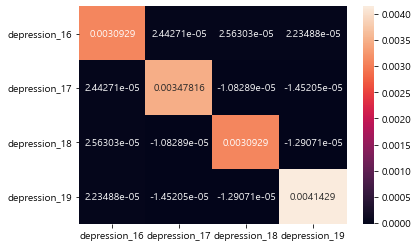

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['depression_16', 'depression_17', 'depression_18', 'depression_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [44]:
# depression 17-20
depression_17 = df1720.loc[df1720['YEAR'] == 2017, 'depression'].dropna().reset_index(drop = True).tolist()
depression_18 = df1720.loc[df1720['YEAR'] == 2018, 'depression'].dropna().reset_index(drop = True).tolist()
depression_19 = df1720.loc[df1720['YEAR'] == 2019, 'depression'].dropna().reset_index(drop = True).tolist()
depression_20 = df1720.loc[df1720['YEAR'] == 2020, 'depression'].dropna().reset_index(drop = True).tolist()

print(len(depression_17))
print(len(depression_18))
print(len(depression_19))
print(len(depression_20))

# 가장 적은 depression_19 에 맞춰서 랜덤샘플링

import random

depression_17_sample = random.choices(depression_17, k=len(depression_19))
depression_18_sample = random.choices(depression_18, k=len(depression_19))
depression_20_sample = random.choices(depression_20, k=len(depression_19))

print(len(depression_17_sample))
print(len(depression_18_sample))
print(len(depression_20_sample))
print(len(depression_19))

x = [depression_17_sample, depression_18_sample, depression_19, depression_20_sample]

32573
30103
28364
30183
28364
28364
28364
28364


In [45]:
np.cov(x)

array([[ 3.96819154e-03,  1.75589912e-05, -1.65745142e-05,
        -6.88263727e-06],
       [ 1.75589912e-05,  4.42267307e-03, -1.84813168e-05,
         2.75827562e-05],
       [-1.65745142e-05, -1.84813168e-05,  4.14304185e-03,
        -7.18717874e-06],
       [-6.88263727e-06,  2.75827562e-05, -7.18717874e-06,
         1.72461836e-03]])

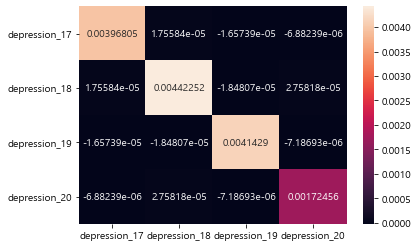

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['depression_17', 'depression_18', 'depression_19', 'depression_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

------------------------

#### PR_BI, M_STR 만 사용

In [53]:
# 16-19, 17-20 각각 추출 후 df 생성

df1619 = df.loc[(df['YEAR'] >= 2016) & (df['YEAR'] <= 2019)].reset_index(drop = True)
df1720 = df.loc[(df['YEAR'] >= 2017) & (df['YEAR'] <= 2020)].reset_index(drop = True)

# 필요한 열만 추출

df1619 = df1619[['YEAR', 'PR_BI', 'M_STR']]
df1720 = df1720[['YEAR', 'PR_BI', 'M_STR']]

In [54]:
df1619_mean = pd.DataFrame(df1619.groupby('YEAR').mean())
df1720_mean = pd.DataFrame(df1720.groupby('YEAR').mean())

In [55]:
df1619_mean

,PR_BI,M_STR
YEAR,,
2016,3.153019,2.766375
2017,3.164124,2.767101
2018,3.160276,2.698867
2019,3.153796,2.717380


In [56]:
df1720_mean

,PR_BI,M_STR
YEAR,,
2017,3.164124,2.767101
2018,3.160276,2.698867
2019,3.153796,2.717380
2020,3.184247,2.830021


cov matrix

In [69]:
# PR_BI 16-19
PR_BI_16 = df1619.loc[df1619['YEAR'] == 2016, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_17 = df1619.loc[df1619['YEAR'] == 2017, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_18 = df1619.loc[df1619['YEAR'] == 2018, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_19 = df1619.loc[df1619['YEAR'] == 2019, 'PR_BI'].dropna().reset_index(drop = True).tolist()

print(len(PR_BI_16))
print(len(PR_BI_17))
print(len(PR_BI_18))
print(len(PR_BI_19))

# 가장 적은 PR_BI_19 맞춰서 랜덤샘플링

import random

PR_BI_16_sample = random.choices(PR_BI_16, k=len(PR_BI_19))
PR_BI_17_sample = random.choices(PR_BI_17, k=len(PR_BI_19))
PR_BI_18_sample = random.choices(PR_BI_18, k=len(PR_BI_19))

print(len(PR_BI_16_sample))
print(len(PR_BI_17_sample))
print(len(PR_BI_18_sample))
print(len(PR_BI_19))

x = [PR_BI_16_sample, PR_BI_17_sample, PR_BI_18_sample, PR_BI_19]

65528
62276
60040
57303
57303
57303
57303
57303


In [73]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.92991896,  0.00047376, -0.00295474, -0.00093627],
       [ 0.00047376,  0.93972841, -0.00134169,  0.0027709 ],
       [-0.00295474, -0.00134169,  0.94068394, -0.00478322],
       [-0.00093627,  0.0027709 , -0.00478322,  0.94687082]])

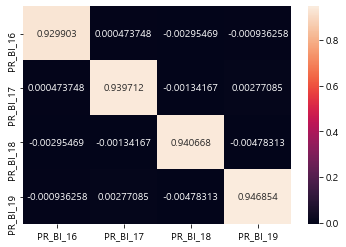

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['PR_BI_16', 'PR_BI_17', 'PR_BI_18', 'PR_BI_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [77]:
# M_STR 16-19
M_STR_16 = df1619.loc[df1619['YEAR'] == 2016, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_17 = df1619.loc[df1619['YEAR'] == 2017, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_18 = df1619.loc[df1619['YEAR'] == 2018, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_19 = df1619.loc[df1619['YEAR'] == 2019, 'M_STR'].dropna().reset_index(drop = True).tolist()

print(len(M_STR_16))
print(len(M_STR_17))
print(len(M_STR_18))
print(len(M_STR_19))

# 가장 적은 M_STR_19 맞춰서 랜덤샘플링

import random

M_STR_16_sample = random.choices(M_STR_16, k=len(M_STR_19))
M_STR_17_sample = random.choices(M_STR_17, k=len(M_STR_19))
M_STR_18_sample = random.choices(M_STR_18, k=len(M_STR_19))

print(len(M_STR_16_sample))
print(len(M_STR_17_sample))
print(len(M_STR_18_sample))
print(len(M_STR_19))

x = [M_STR_16_sample, M_STR_17_sample, M_STR_18_sample, M_STR_19]

65528
62276
60040
57303
57303
57303
57303
57303


In [78]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.92192685, -0.0029068 ,  0.00067583, -0.00159346],
       [-0.0029068 ,  0.95646604,  0.00111389,  0.00292226],
       [ 0.00067583,  0.00111389,  0.94705712, -0.00452   ],
       [-0.00159346,  0.00292226, -0.00452   ,  0.9833856 ]])

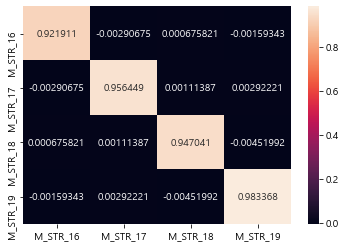

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['M_STR_16', 'M_STR_17', 'M_STR_18', 'M_STR_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [82]:
# PR_BI 17-20
PR_BI_17 = df1720.loc[df1720['YEAR'] == 2017, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_18 = df1720.loc[df1720['YEAR'] == 2018, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_19 = df1720.loc[df1720['YEAR'] == 2019, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_20 = df1720.loc[df1720['YEAR'] == 2020, 'PR_BI'].dropna().reset_index(drop = True).tolist()

print(len(PR_BI_17))
print(len(PR_BI_18))
print(len(PR_BI_19))
print(len(PR_BI_20))

# 가장 적은 PR_BI_20 에 맞춰서 랜덤샘플링

import random

PR_BI_17_sample = random.choices(PR_BI_17, k=len(PR_BI_20))
PR_BI_18_sample = random.choices(PR_BI_18, k=len(PR_BI_20))
PR_BI_19_sample = random.choices(PR_BI_20, k=len(PR_BI_20))

print(len(PR_BI_17_sample))
print(len(PR_BI_18_sample))
print(len(PR_BI_19_sample))
print(len(PR_BI_20))

x = [PR_BI_17_sample, PR_BI_18_sample, PR_BI_19_sample, PR_BI_20]

62276
60040
57303
54948
54948
54948
54948
54948


In [83]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.94335003, -0.00620554,  0.00498644,  0.00039933],
       [-0.00620554,  0.92984723, -0.00129968,  0.00129134],
       [ 0.00498644, -0.00129968,  0.94399635,  0.00439079],
       [ 0.00039933,  0.00129134,  0.00439079,  0.94525059]])

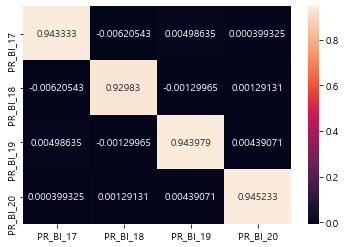

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['PR_BI_17', 'PR_BI_18', 'PR_BI_19', 'PR_BI_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [86]:
# M_STR 17-20
M_STR_17 = df1720.loc[df1720['YEAR'] == 2017, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_18 = df1720.loc[df1720['YEAR'] == 2018, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_19 = df1720.loc[df1720['YEAR'] == 2019, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_20 = df1720.loc[df1720['YEAR'] == 2020, 'M_STR'].dropna().reset_index(drop = True).tolist()

print(len(M_STR_17))
print(len(M_STR_18))
print(len(M_STR_19))
print(len(M_STR_20))

# 가장 적은 M_STR_20 에 맞춰서 랜덤샘플링

import random

M_STR_17_sample = random.choices(M_STR_17, k=len(M_STR_20))
M_STR_18_sample = random.choices(M_STR_18, k=len(M_STR_20))
M_STR_19_sample = random.choices(M_STR_20, k=len(M_STR_20))

print(len(M_STR_17_sample))
print(len(M_STR_18_sample))
print(len(M_STR_19_sample))
print(len(M_STR_20))

x = [M_STR_17_sample, M_STR_18_sample, M_STR_19_sample, M_STR_20]

62276
60040
57303
54948
54948
54948
54948
54948


In [87]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.96166182, -0.00336115,  0.00300671,  0.00029217],
       [-0.00336115,  0.94469479, -0.0008757 , -0.00996249],
       [ 0.00300671, -0.0008757 ,  0.88747391, -0.00152256],
       [ 0.00029217, -0.00996249, -0.00152256,  0.88893656]])

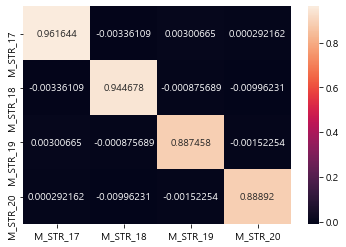

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['M_STR_17', 'M_STR_18', 'M_STR_19', 'M_STR_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

#### PR_BI, M_STR 두개만 사용 + YEAR,GRADE,CITY 로 aggregate

In [5]:
df_PRBI = data2[['YEAR', 'CITY', 'GRADE', 'PR_BI']]
df_MSTR = data2[['YEAR', 'CITY', 'GRADE', 'M_STR']]

In [15]:
df_PRBI_groupby = pd.DataFrame(df_PRBI.groupby(['CITY', 'GRADE', 'YEAR']).mean())
df_PRBI_groupby.to_csv('D:\\SNUlab\\1. Results\\청소년건강행태인식조사\\PR_BI_1421_aggregate.csv', encoding = 'euc-kr')

In [16]:
df_MSTR_groupby = pd.DataFrame(df_MSTR.groupby(['CITY', 'GRADE', 'YEAR']).mean())
df_MSTR_groupby.to_csv('D:\\SNUlab\\1. Results\\청소년건강행태인식조사\\M_STR_1421_aggregate.csv', encoding = 'euc-kr')

In [35]:
# GRADE / YEAR / CITY 에 따라 cov_matrix, heatmap 그리는 함수 생성

import random

def cov_matrix_heatmap(df, var_name, year_start, year_end, grade, city): 

    # print title
    print("{} {}-{} {} grade{}".format(var_name, year_start, year_end, city, grade))
    # loc data
    data = df.loc[(df['CITY'] == city) & (df['GRADE'] == grade) & (df['YEAR'] >= year_start) & (df['YEAR'] <= year_end)].reset_index(drop = True)

    # generate list of var by year
    x = []
    for yr in range(year_start, year_end + 1): 
        tmp = data.loc[data['YEAR'] == yr, var_name].dropna().reset_index(drop = True).tolist()
        x.append(tmp)

    lst_len = []
    for element in x: # 각 년도별로 na 제거했을 때 가장 작은 n수를 smallest_len 에 저장
        lst_len.append(len(element))

    smallest_len = min(lst_len)

    x_random_sampled = []
    for element in x: 
        tmp = random.choices(element, k= smallest_len)
        x_random_sampled.append(tmp)

    np.set_printoptions(suppress=True)
    print(np.cov(x_random_sampled, bias=True))  # covariance matrix 출력

    cov = np.cov(x_random_sampled, bias=True)

    labs = []
    for yr in range(year_start, year_end + 1): 
        labs.append('{}_{}_grade{}_{}'.format(var_name, city, grade, yr))

    sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
    plt.show()

PR_BI 2016-2019 서울 grade1
[[ 0.94227298  0.02880892  0.01636606  0.01279588]
 [ 0.02880892  0.9034462   0.03579643  0.0302598 ]
 [ 0.01636606  0.03579643  0.92118853 -0.03020278]
 [ 0.01279588  0.0302598  -0.03020278  0.9483919 ]]


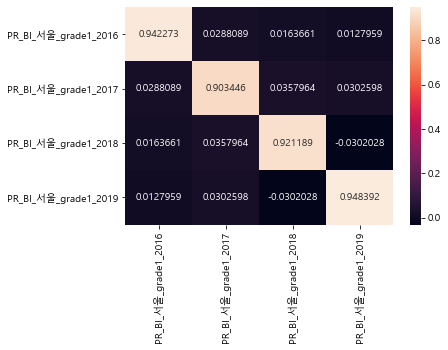

PR_BI 2016-2019 서울 grade2
[[ 0.92378884  0.00933306 -0.00715837  0.0008905 ]
 [ 0.00933306  0.93677202  0.0371579  -0.00369011]
 [-0.00715837  0.0371579   0.93348498 -0.05763252]
 [ 0.0008905  -0.00369011 -0.05763252  0.97600025]]


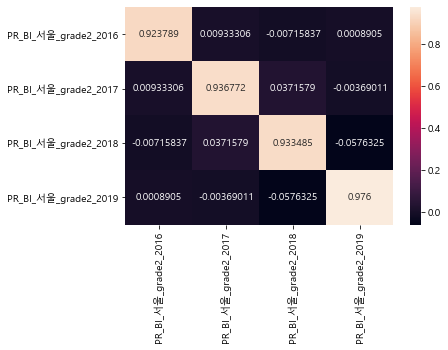

PR_BI 2016-2019 서울 grade3
[[ 0.91284485  0.05908471 -0.02451589  0.01910949]
 [ 0.05908471  0.88705343 -0.03597109  0.03261319]
 [-0.02451589 -0.03597109  0.92278908  0.03759951]
 [ 0.01910949  0.03261319  0.03759951  0.97275278]]


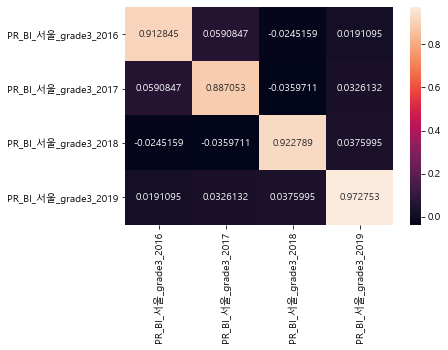

PR_BI 2016-2019 서울 grade4
[[ 0.89337659 -0.01471675 -0.03881008  0.04696657]
 [-0.01471675  0.91789565 -0.02613433 -0.02707595]
 [-0.03881008 -0.02613433  0.90798365  0.01994071]
 [ 0.04696657 -0.02707595  0.01994071  1.02569057]]


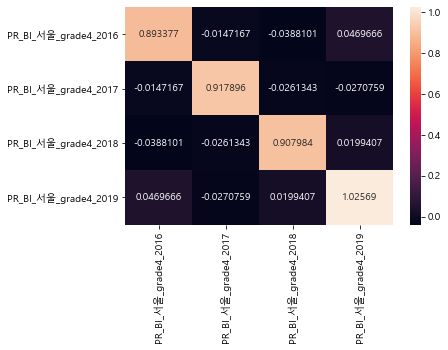

PR_BI 2016-2019 서울 grade5
[[ 0.99918835  0.0154233   0.018649    0.01579133]
 [ 0.0154233   0.98639694  0.02937449 -0.00908827]
 [ 0.018649    0.02937449  0.97629312 -0.02811326]
 [ 0.01579133 -0.00908827 -0.02811326  0.99522162]]


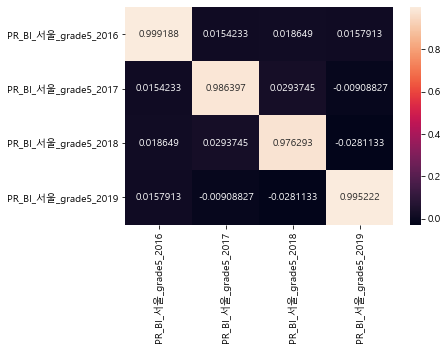

PR_BI 2016-2019 서울 grade6
[[ 0.96988933 -0.07314457  0.00561479  0.0187447 ]
 [-0.07314457  0.95416289  0.03376405 -0.0150704 ]
 [ 0.00561479  0.03376405  0.90721789  0.04408907]
 [ 0.0187447  -0.0150704   0.04408907  0.98528942]]


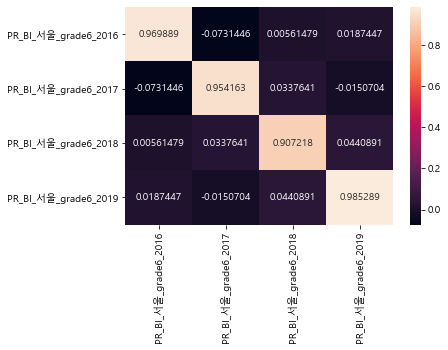

PR_BI 2016-2019 부산 grade1
[[ 0.84697944  0.06411144 -0.0736514  -0.02428424]
 [ 0.06411144  0.83678862  0.03728338  0.00308577]
 [-0.0736514   0.03728338  0.89555312  0.02245612]
 [-0.02428424  0.00308577  0.02245612  0.87761415]]


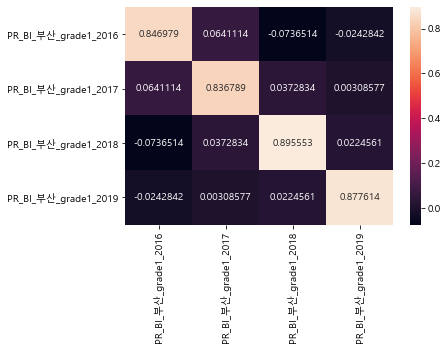

PR_BI 2016-2019 부산 grade2
[[ 0.90788864 -0.00580608  0.0149376   0.0571648 ]
 [-0.00580608  0.88536576 -0.0348672   0.0300544 ]
 [ 0.0149376  -0.0348672   0.845184    0.002432  ]
 [ 0.0571648   0.0300544   0.002432    0.859136  ]]


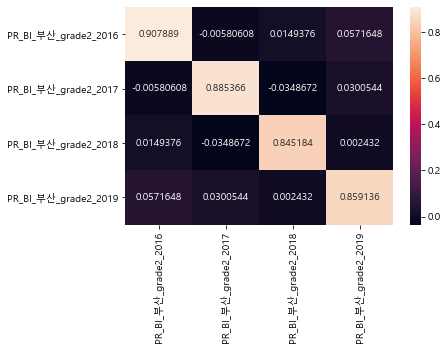

PR_BI 2016-2019 부산 grade3
[[0.95046275 0.02248896 0.00139304 0.02346119]
 [0.02248896 0.91120211 0.01620285 0.05299374]
 [0.00139304 0.01620285 0.83280852 0.04405504]
 [0.02346119 0.05299374 0.04405504 0.96086996]]


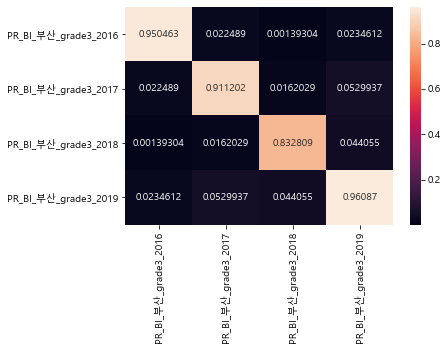

PR_BI 2016-2019 부산 grade4
[[ 0.85314586 -0.01708438  0.01267714  0.02238447]
 [-0.01708438  0.83261357 -0.09212143 -0.00533175]
 [ 0.01267714 -0.09212143  0.85066045  0.0181292 ]
 [ 0.02238447 -0.00533175  0.0181292   1.05346943]]


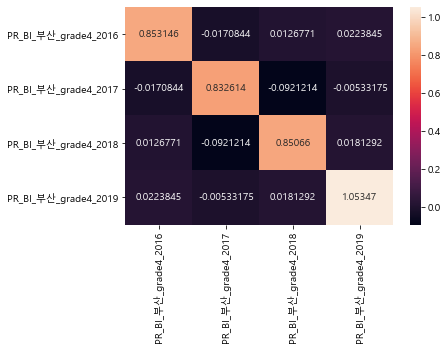

PR_BI 2016-2019 부산 grade5
[[ 0.97124429 -0.01948899 -0.10230225 -0.00511611]
 [-0.01948899  0.92283702  0.01653279  0.01663564]
 [-0.10230225  0.01653279  1.06930634  0.00869937]
 [-0.00511611  0.01663564  0.00869937  0.81701122]]


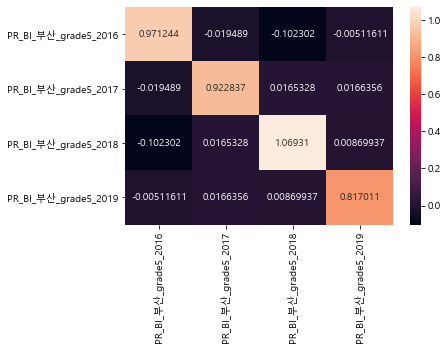

PR_BI 2016-2019 부산 grade6
[[ 0.95420599  0.06366709  0.01895089 -0.01368304]
 [ 0.06366709  0.88559949 -0.03602679 -0.0634375 ]
 [ 0.01895089 -0.03602679  0.97573661 -0.05939732]
 [-0.01368304 -0.0634375  -0.05939732  0.97984375]]


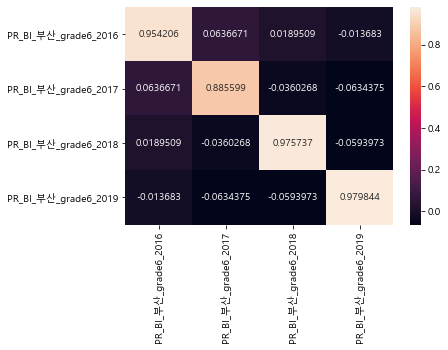

PR_BI 2016-2019 대구 grade1
[[ 0.86255291  0.06714827 -0.044617   -0.00432804]
 [ 0.06714827  0.99662213  0.05510068 -0.00985629]
 [-0.044617    0.05510068  0.87756466 -0.00804688]
 [-0.00432804 -0.00985629 -0.00804688  0.81893608]]


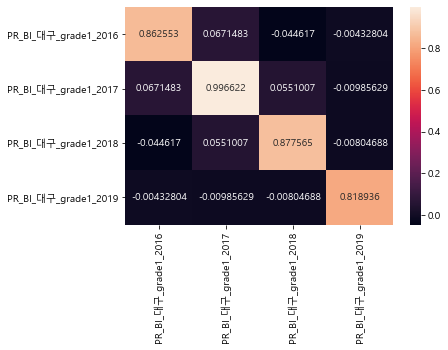

PR_BI 2016-2019 대구 grade2
[[ 0.87670583  0.0113524   0.07119972 -0.03157839]
 [ 0.0113524   0.98136941  0.04552826  0.02486716]
 [ 0.07119972  0.04552826  0.91657767  0.00212281]
 [-0.03157839  0.02486716  0.00212281  0.86284386]]


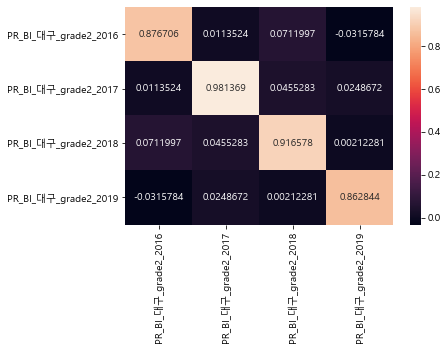

PR_BI 2016-2019 대구 grade3
[[ 0.80680123 -0.0136486  -0.01834679  0.03788543]
 [-0.0136486   0.81460977 -0.02510573 -0.00569012]
 [-0.01834679 -0.02510573  0.89571703  0.02628989]
 [ 0.03788543 -0.00569012  0.02628989  0.87098808]]


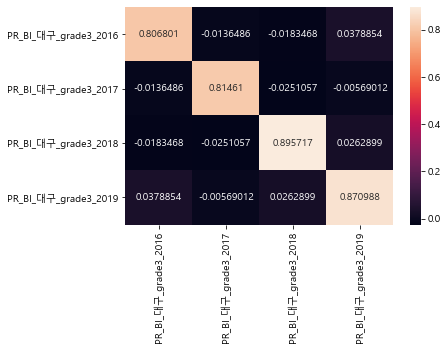

PR_BI 2016-2019 대구 grade4
[[ 0.96359538  0.0039444  -0.02228331  0.01200396]
 [ 0.0039444   0.84710744 -0.00864012  0.04244929]
 [-0.02228331 -0.00864012  0.94078273  0.02870364]
 [ 0.01200396  0.04244929  0.02870364  0.87054761]]


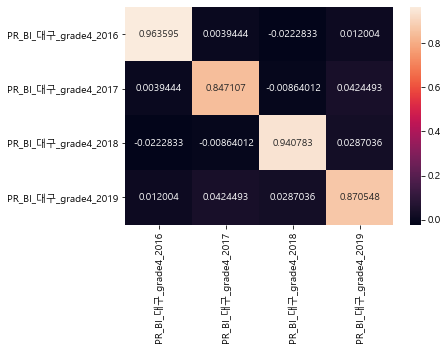

PR_BI 2016-2019 대구 grade5
[[ 0.9985775   0.03651701  0.07903592  0.01911626]
 [ 0.03651701  0.89135633 -0.02243856  0.0614603 ]
 [ 0.07903592 -0.02243856  0.92166352 -0.03383743]
 [ 0.01911626  0.0614603  -0.03383743  0.87785917]]


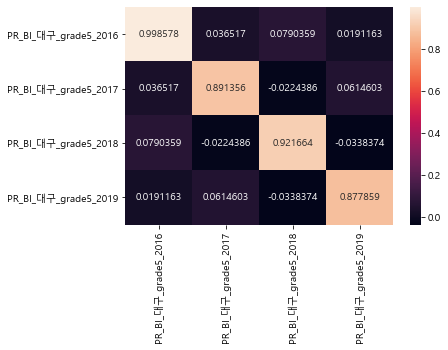

PR_BI 2016-2019 대구 grade6
[[ 0.9972496   0.08963394 -0.00330353  0.00922394]
 [ 0.08963394  1.02245712  0.05988312 -0.061409  ]
 [-0.00330353  0.05988312  0.94309998 -0.05430603]
 [ 0.00922394 -0.061409   -0.05430603  0.98875427]]


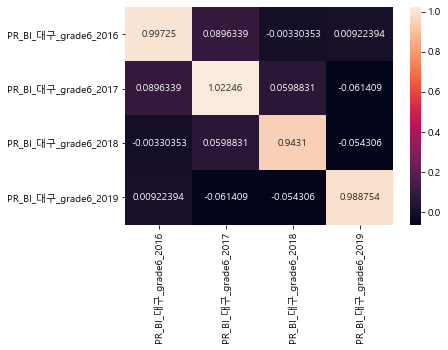

PR_BI 2016-2019 인천 grade1
[[ 0.93105748 -0.03546455 -0.01081729 -0.03254516]
 [-0.03546455  0.96690552 -0.05338166 -0.00724147]
 [-0.01081729 -0.05338166  0.90264438  0.04166609]
 [-0.03254516 -0.00724147  0.04166609  0.7899421 ]]


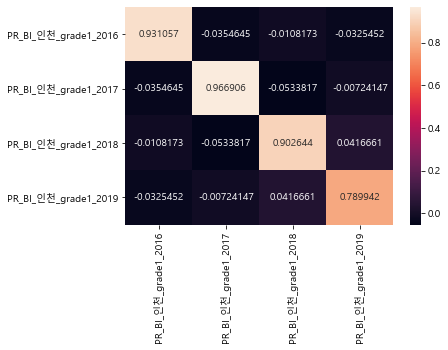

PR_BI 2016-2019 인천 grade2
[[ 0.77528027 -0.05971369 -0.07418347 -0.05247388]
 [-0.05971369  0.85559428 -0.02768589 -0.01005238]
 [-0.07418347 -0.02768589  0.93772317 -0.00977998]
 [-0.05247388 -0.01005238 -0.00977998  0.91067725]]


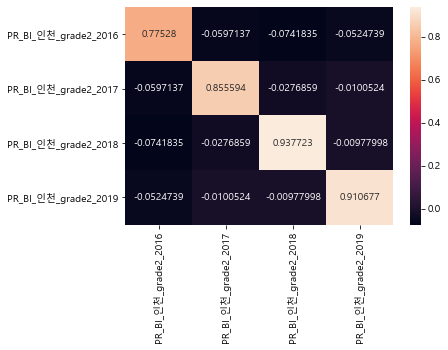

PR_BI 2016-2019 인천 grade3
[[ 0.8934292   0.01391959  0.03522716 -0.01710469]
 [ 0.01391959  0.94609702  0.05917635 -0.03819157]
 [ 0.03522716  0.05917635  0.93973999 -0.03903149]
 [-0.01710469 -0.03819157 -0.03903149  0.93015504]]


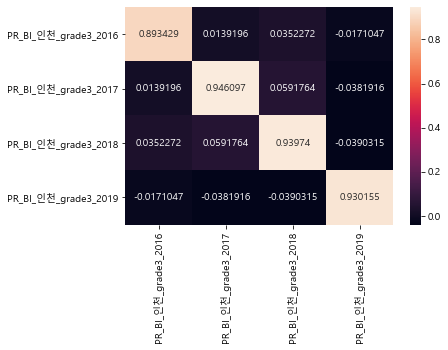

PR_BI 2016-2019 인천 grade4
[[ 1.01040302 -0.01857361 -0.01877768  0.07717172]
 [-0.01857361  0.88066116  0.03866544 -0.01373737]
 [-0.01877768  0.03866544  1.00232221 -0.05616162]
 [ 0.07717172 -0.01373737 -0.05616162  0.88323232]]


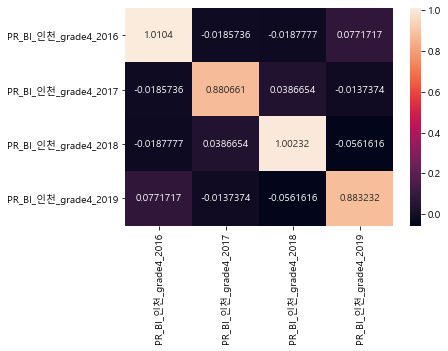

PR_BI 2016-2019 인천 grade5
[[ 1.0048022  -0.11722508 -0.08038054 -0.01266753]
 [-0.11722508  0.83790695 -0.03715283  0.00747009]
 [-0.08038054 -0.03715283  1.11633183  0.06302543]
 [-0.01266753  0.00747009  0.06302543  1.11324894]]


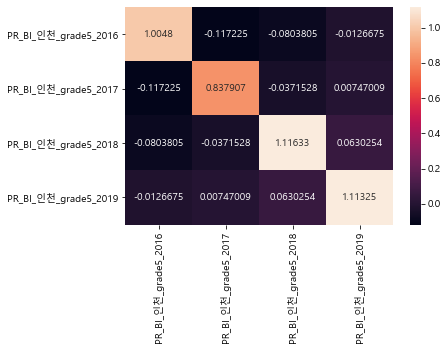

PR_BI 2016-2019 인천 grade6
[[ 0.96512772 -0.00825337  0.05279668  0.00117259]
 [-0.00825337  0.9236535   0.00743897 -0.02107267]
 [ 0.05279668  0.00743897  0.99460458  0.01971157]
 [ 0.00117259 -0.02107267  0.01971157  0.97945518]]


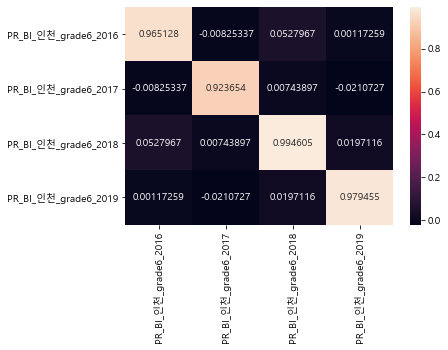

PR_BI 2016-2019 광주 grade1
[[ 0.99155588 -0.022542   -0.05354273 -0.08296567]
 [-0.022542    0.88684441  0.043645   -0.05016801]
 [-0.05354273  0.043645    0.92289993  0.05609934]
 [-0.08296567 -0.05016801  0.05609934  0.90705625]]


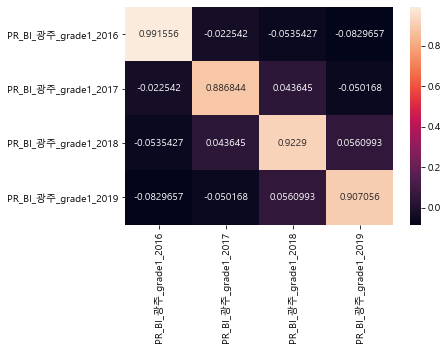

PR_BI 2016-2019 광주 grade2
[[ 0.91705859  0.11218891 -0.00200862  0.04443465]
 [ 0.11218891  0.90196243 -0.00935024  0.00291145]
 [-0.00200862 -0.00935024  0.92268554  0.03094118]
 [ 0.04443465  0.00291145  0.03094118  0.90009378]]


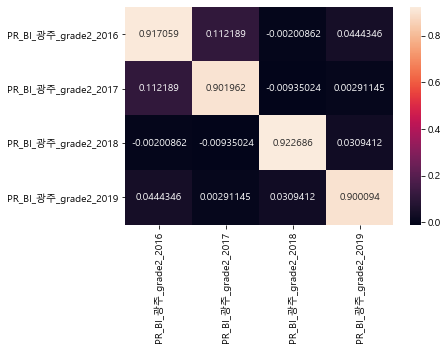

PR_BI 2016-2019 광주 grade3
[[ 0.88536973  0.03446066 -0.01797681 -0.00788062]
 [ 0.03446066  1.09724656 -0.02436447 -0.02994771]
 [-0.01797681 -0.02436447  0.87114917 -0.00661945]
 [-0.00788062 -0.02994771 -0.00661945  0.88385632]]


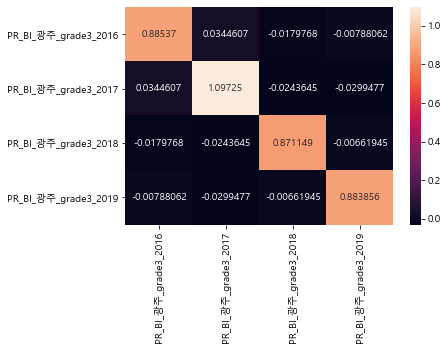

PR_BI 2016-2019 광주 grade4
[[ 0.89388997 -0.10553439  0.08341328  0.01669362]
 [-0.10553439  0.89172446  0.07524465 -0.05855103]
 [ 0.08341328  0.07524465  1.02475261  0.02488967]
 [ 0.01669362 -0.05855103  0.02488967  1.0378005 ]]


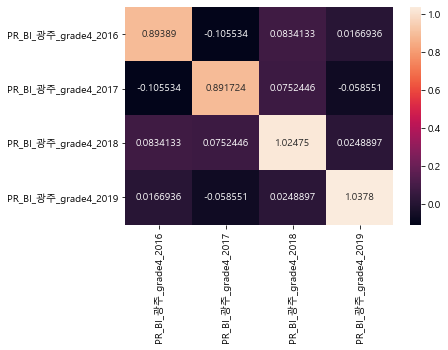

PR_BI 2016-2019 광주 grade5
[[ 0.89406792 -0.00471711  0.05860698 -0.00697069]
 [-0.00471711  0.82940007 -0.00439517  0.0271269 ]
 [ 0.05860698 -0.00439517  0.89171636  0.01931637]
 [-0.00697069  0.0271269   0.01931637  0.8425296 ]]


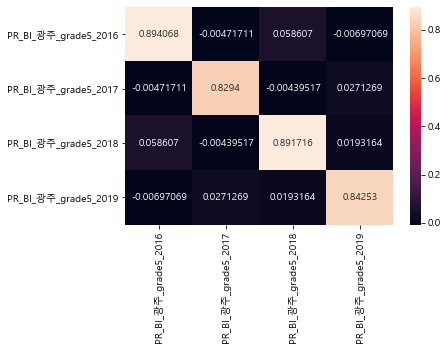

PR_BI 2016-2019 광주 grade6
[[ 0.96716315 -0.01680941 -0.04017019  0.03297847]
 [-0.01680941  0.8894581   0.00288161 -0.03329865]
 [-0.04017019  0.00288161  0.93294091  0.02745538]
 [ 0.03297847 -0.03329865  0.02745538  1.00008004]]


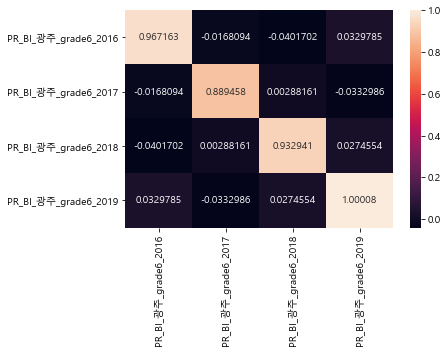

PR_BI 2016-2019 대전 grade1
[[ 1.04315886  0.08999082 -0.08514901 -0.0320561 ]
 [ 0.08999082  0.73461892 -0.01552717  0.05083897]
 [-0.08514901 -0.01552717  0.85818364  0.01800879]
 [-0.0320561   0.05083897  0.01800879  0.88696127]]


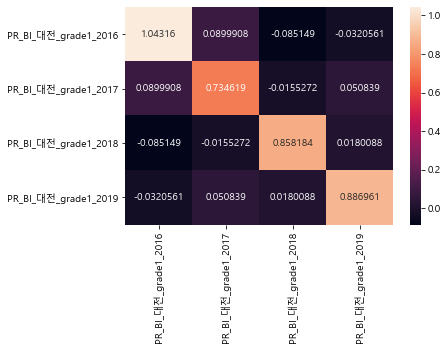

PR_BI 2016-2019 대전 grade2
[[ 0.88844797 -0.07010582  0.02542622 -0.02013521]
 [-0.07010582  1.12830688 -0.02160494 -0.03130511]
 [ 0.02542622 -0.02160494  0.78864673  0.06799222]
 [-0.02013521 -0.03130511  0.06799222  0.93855855]]


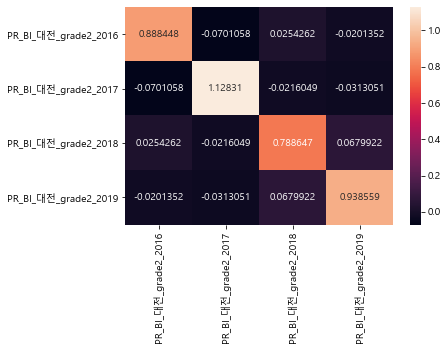

PR_BI 2016-2019 대전 grade3
[[ 1.04086387 -0.1113482  -0.04124265 -0.01273326]
 [-0.1113482   1.06527613  0.05652635 -0.06210702]
 [-0.04124265  0.05652635  1.10788238  0.01642004]
 [-0.01273326 -0.06210702  0.01642004  1.00392036]]


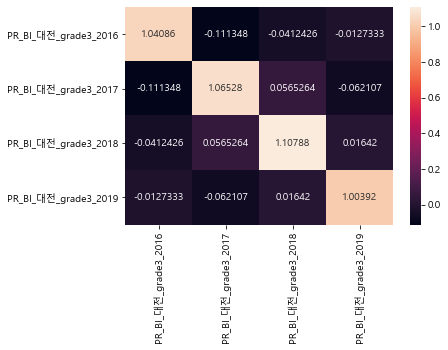

PR_BI 2016-2019 대전 grade4
[[ 1.10160343  0.01966206  0.03505358 -0.08193257]
 [ 0.01966206  1.00469318 -0.04364747 -0.00344284]
 [ 0.03505358 -0.04364747  1.01823561  0.00866434]
 [-0.08193257 -0.00344284  0.00866434  0.90214759]]


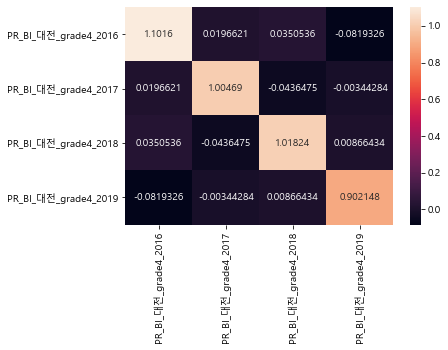

PR_BI 2016-2019 대전 grade5
[[ 1.0294424   0.02771992 -0.08730572 -0.00146211]
 [ 0.02771992  1.00600865 -0.03709341  0.03036372]
 [-0.08730572 -0.03709341  0.85438031 -0.00992429]
 [-0.00146211  0.03036372 -0.00992429  0.85325869]]


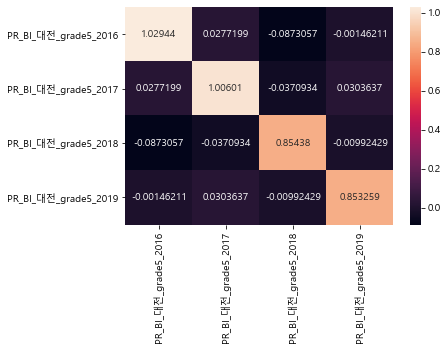

PR_BI 2016-2019 대전 grade6
[[ 1.0166358  -0.04833333  0.00808642  0.00966049]
 [-0.04833333  1.01        0.06888889  0.02277778]
 [ 0.00808642  0.06888889  0.83691358 -0.0282716 ]
 [ 0.00966049  0.02277778 -0.0282716   0.86515432]]


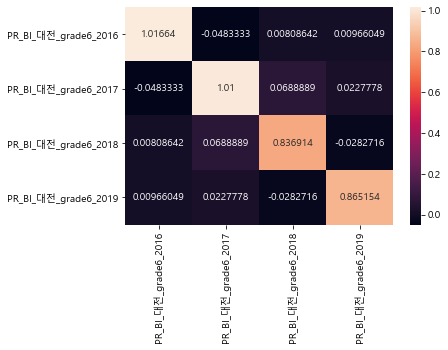

PR_BI 2016-2019 울산 grade1
[[ 0.73714148  0.06381189 -0.06140843  0.02275276]
 [ 0.06381189  0.9011777  -0.08622416 -0.01738503]
 [-0.06140843 -0.08622416  0.90461264 -0.02938231]
 [ 0.02275276 -0.01738503 -0.02938231  1.15009614]]


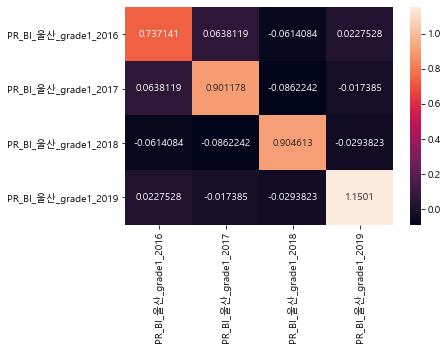

PR_BI 2016-2019 울산 grade2
[[ 0.83264111  0.00686286  0.00500376 -0.05076935]
 [ 0.00686286  0.67778173 -0.04161228  0.05895732]
 [ 0.00500376 -0.04161228  0.74648946 -0.12303706]
 [-0.05076935  0.05895732 -0.12303706  0.92184842]]


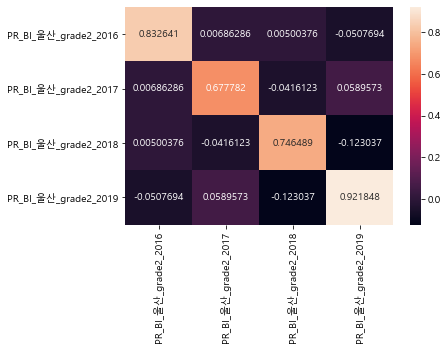

PR_BI 2016-2019 울산 grade3
[[ 0.99856801  0.05729807 -0.00608827 -0.00422206]
 [ 0.05729807  0.7932484  -0.0471448  -0.01325745]
 [-0.00608827 -0.0471448   0.96752617  0.02268087]
 [-0.00422206 -0.01325745  0.02268087  0.89099325]]


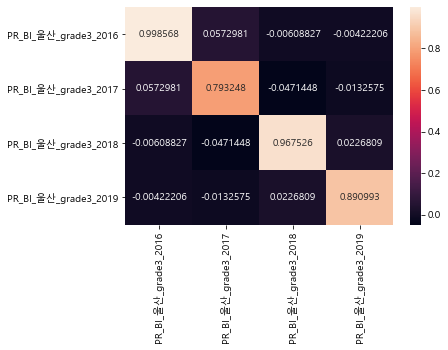

PR_BI 2016-2019 울산 grade4
[[ 0.94811363 -0.06143539  0.0113727  -0.09542686]
 [-0.06143539  0.91680703  0.02917896  0.00959968]
 [ 0.0113727   0.02917896  0.874533   -0.02098504]
 [-0.09542686  0.00959968 -0.02098504  1.04221071]]


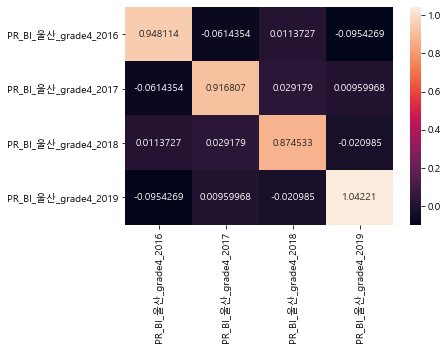

PR_BI 2016-2019 울산 grade5
[[ 1.07907144 -0.19786488  0.02380494  0.01193458]
 [-0.19786488  0.92866227  0.02771033 -0.0134505 ]
 [ 0.02380494  0.02771033  0.99975591  0.02846829]
 [ 0.01193458 -0.0134505   0.02846829  1.03359412]]


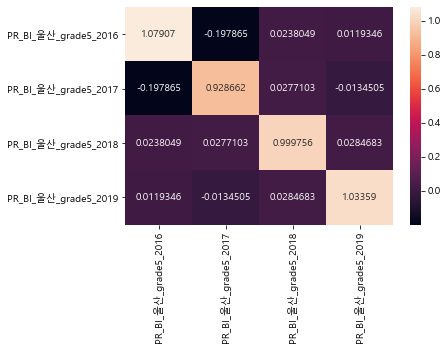

PR_BI 2016-2019 울산 grade6
[[ 0.933547   -0.06454623  0.04166498  0.04501197]
 [-0.06454623  0.99692685  0.06475922 -0.00722139]
 [ 0.04166498  0.06475922  0.90333279 -0.06661528]
 [ 0.04501197 -0.00722139 -0.06661528  0.83163617]]


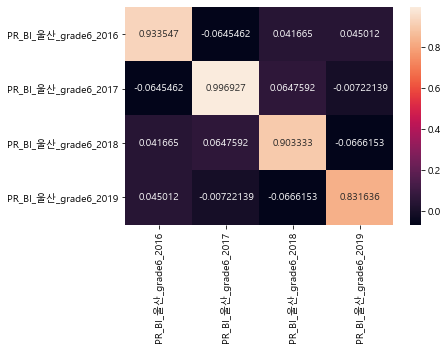

PR_BI 2016-2019 경기 grade1
[[ 0.92150335  0.00755933 -0.00700782  0.01267636]
 [ 0.00755933  0.87472708  0.00149811 -0.03094967]
 [-0.00700782  0.00149811  0.84951634 -0.00098951]
 [ 0.01267636 -0.03094967 -0.00098951  0.8515411 ]]


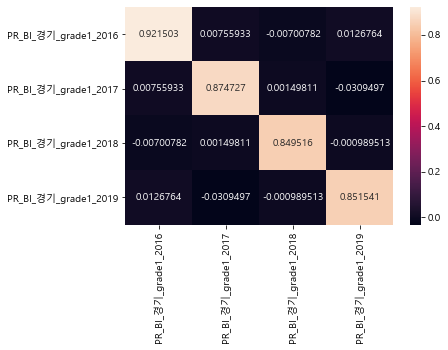

PR_BI 2016-2019 경기 grade2
[[ 0.9846934   0.00287066  0.0031534   0.01866741]
 [ 0.00287066  0.88330183  0.01864568  0.00071719]
 [ 0.0031534   0.01864568  0.98041052 -0.01202428]
 [ 0.01866741  0.00071719 -0.01202428  0.86548454]]


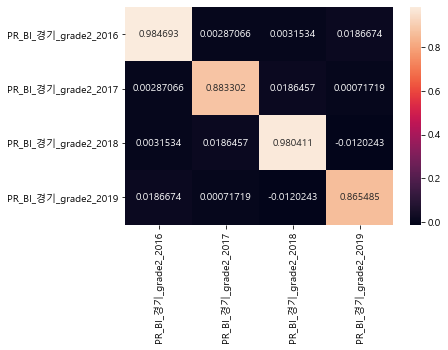

PR_BI 2016-2019 경기 grade3
[[ 0.92090296  0.00974189 -0.00146042  0.00670351]
 [ 0.00974189  0.91729297  0.00634545  0.00707606]
 [-0.00146042  0.00634545  0.9760285   0.01786738]
 [ 0.00670351  0.00707606  0.01786738  0.92450972]]


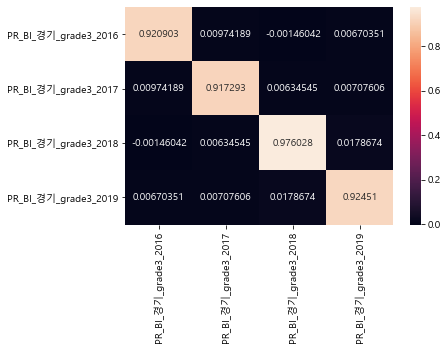

PR_BI 2016-2019 경기 grade4
[[ 1.01392917 -0.00849083  0.01324187  0.01579553]
 [-0.00849083  0.96901966  0.0109451  -0.0218625 ]
 [ 0.01324187  0.0109451   0.9598695   0.01109825]
 [ 0.01579553 -0.0218625   0.01109825  0.94708438]]


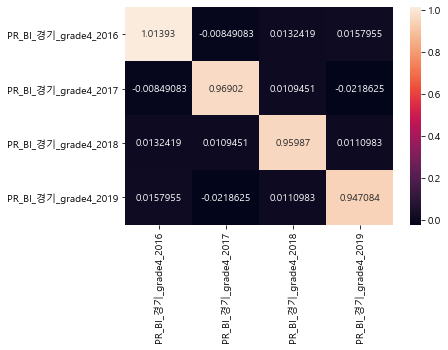

PR_BI 2016-2019 경기 grade5
[[ 0.97857391 -0.00103752  0.01534386  0.01614945]
 [-0.00103752  1.0065049   0.01173342 -0.01371079]
 [ 0.01534386  0.01173342  0.96889133 -0.00454597]
 [ 0.01614945 -0.01371079 -0.00454597  0.97853588]]


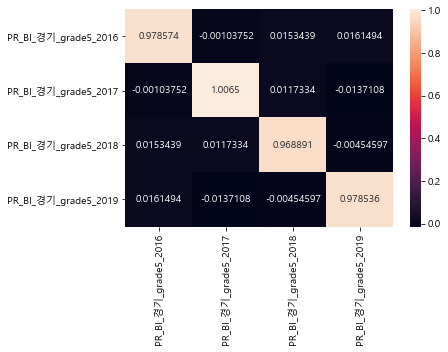

PR_BI 2016-2019 경기 grade6
[[ 0.99243166  0.00279413  0.00169989 -0.01253522]
 [ 0.00279413  0.94995638 -0.00420596 -0.02838568]
 [ 0.00169989 -0.00420596  0.94663086  0.0296398 ]
 [-0.01253522 -0.02838568  0.0296398   0.96847387]]


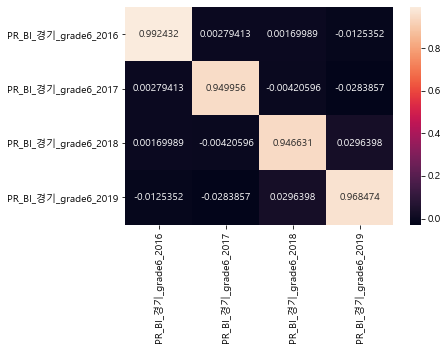

PR_BI 2016-2019 강원 grade1
[[ 0.91447235 -0.00638014  0.01762777  0.00057463]
 [-0.00638014  0.77040799 -0.06549148  0.04519335]
 [ 0.01762777 -0.06549148  0.69115062 -0.02677123]
 [ 0.00057463  0.04519335 -0.02677123  0.86492699]]


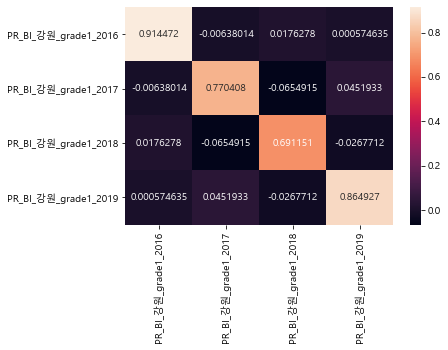

PR_BI 2016-2019 강원 grade2
[[ 1.0252171  -0.07945416  0.00888321 -0.02641334]
 [-0.07945416  0.99976371 -0.00313091 -0.02782372]
 [ 0.00888321 -0.00313091  0.82111738  0.01703539]
 [-0.02641334 -0.02782372  0.01703539  0.84586927]]


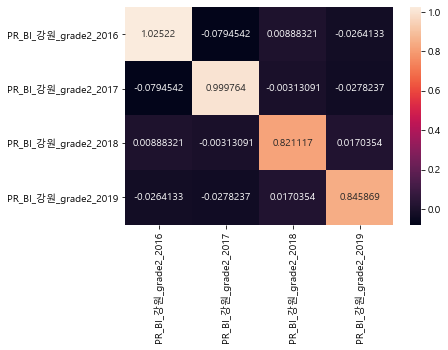

PR_BI 2016-2019 강원 grade3
[[ 1.0060786  -0.01835048 -0.09370889 -0.03375274]
 [-0.01835048  1.02917861  0.11293641 -0.04493169]
 [-0.09370889  0.11293641  1.04253668  0.11543262]
 [-0.03375274 -0.04493169  0.11543262  0.91559454]]


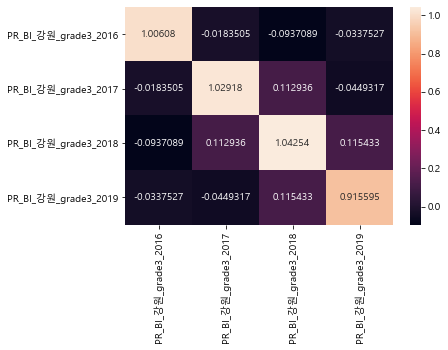

PR_BI 2016-2019 강원 grade4
[[ 0.87675356 -0.01983338 -0.00881483 -0.07342112]
 [-0.01983338  0.98506853 -0.04117173  0.01694168]
 [-0.00881483 -0.04117173  0.91867777 -0.01789841]
 [-0.07342112  0.01694168 -0.01789841  0.88176297]]


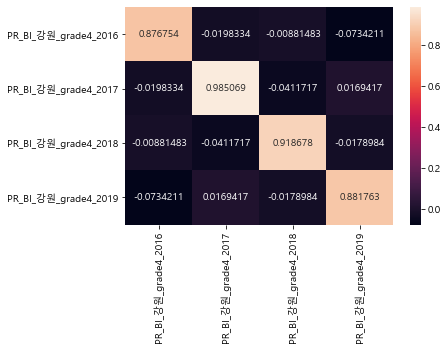

PR_BI 2016-2019 강원 grade5
[[ 0.96744591  0.03817096  0.03838851  0.10294292]
 [ 0.03817096  0.91627111 -0.01474427  0.08994897]
 [ 0.03838851 -0.01474427  0.9755251  -0.0663344 ]
 [ 0.10294292  0.08994897 -0.0663344   1.17076065]]


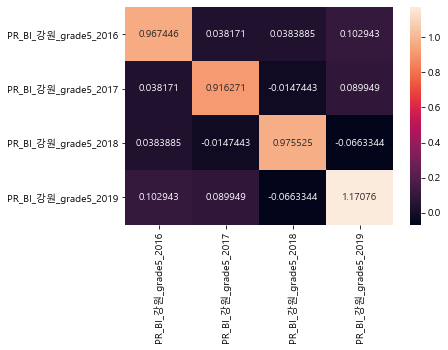

PR_BI 2016-2019 강원 grade6
[[ 0.89371094  0.01361328 -0.07574219  0.03324219]
 [ 0.01361328  1.01045898 -0.00228516  0.02134766]
 [-0.07574219 -0.00228516  0.87339844 -0.03402344]
 [ 0.03324219  0.02134766 -0.03402344  0.81714844]]


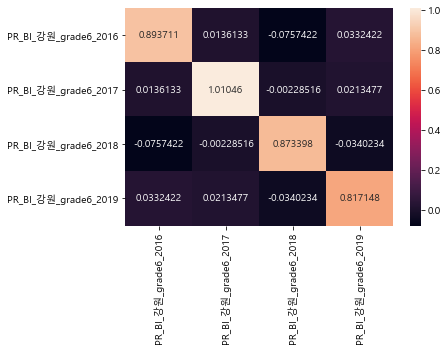

PR_BI 2016-2019 충북 grade1
[[ 0.77181417  0.05189     0.02795383 -0.00616795]
 [ 0.05189     0.82062019 -0.04374151 -0.08137166]
 [ 0.02795383 -0.04374151  0.95359891  0.02501132]
 [-0.00616795 -0.08137166  0.02501132  1.00497963]]


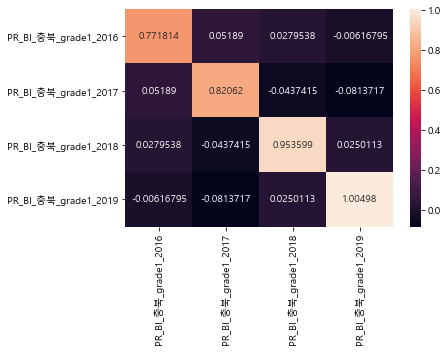

PR_BI 2016-2019 충북 grade2
[[ 1.07520282  0.00470058 -0.02463596 -0.06427364]
 [ 0.00470058  0.89190607  0.02099722  0.02107492]
 [-0.02463596  0.02099722  0.77623034  0.01864693]
 [-0.06427364  0.02107492  0.01864693  1.00402074]]


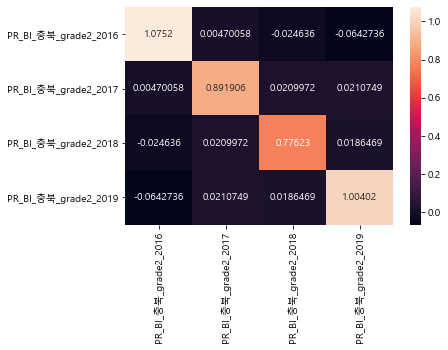

PR_BI 2016-2019 충북 grade3
[[ 1.06391049 -0.01586693 -0.0419836  -0.01843763]
 [-0.01586693  1.04738932  0.02279261 -0.00145386]
 [-0.0419836   0.02279261  0.83301062  0.00736844]
 [-0.01843763 -0.00145386  0.00736844  0.91371323]]


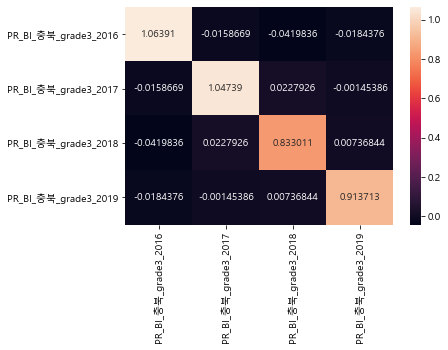

PR_BI 2016-2019 충북 grade4
[[ 0.97734639 -0.02681346 -0.03516656  0.00999031]
 [-0.02681346  0.89485115 -0.01403321  0.03324535]
 [-0.03516656 -0.01403321  1.10568345  0.01876107]
 [ 0.00999031  0.03324535  0.01876107  1.07979719]]


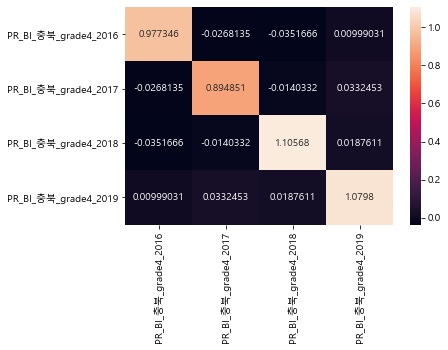

PR_BI 2016-2019 충북 grade5
[[ 1.01374427 -0.0668769   0.0245136  -0.00523591]
 [-0.0668769   0.99796853  0.01033583 -0.03731438]
 [ 0.0245136   0.01033583  1.02822803 -0.00816837]
 [-0.00523591 -0.03731438 -0.00816837  1.12398745]]


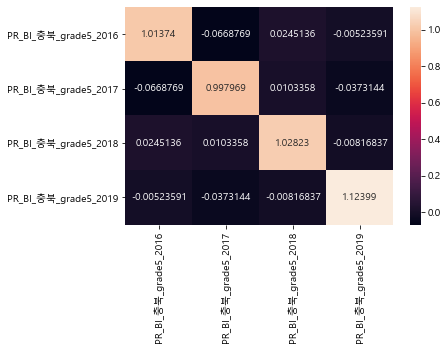

PR_BI 2016-2019 충북 grade6
[[ 1.04663537 -0.01807602  0.09837278 -0.04797881]
 [-0.01807602  1.04355603 -0.00475486  0.02443093]
 [ 0.09837278 -0.00475486  0.89454776 -0.03983516]
 [-0.04797881  0.02443093 -0.03983516  1.04228807]]


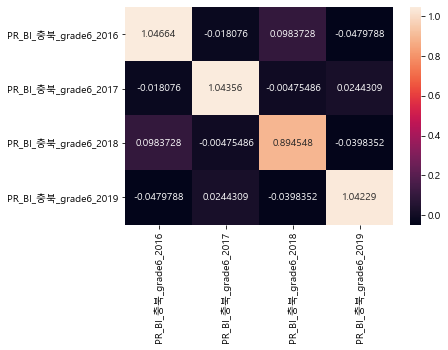

PR_BI 2016-2019 충남 grade1
[[ 0.96997832 -0.01807428  0.08622396  0.04387784]
 [-0.01807428  0.94337355  0.01144076  0.02641625]
 [ 0.08622396  0.01144076  0.88191041 -0.02230418]
 [ 0.04387784  0.02641625 -0.02230418  0.90095673]]


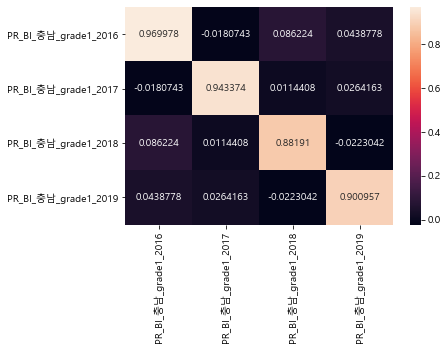

PR_BI 2016-2019 충남 grade2
[[ 0.97595186  0.02298042 -0.01273994  0.00117693]
 [ 0.02298042  1.18037322 -0.05257347  0.06357834]
 [-0.01273994 -0.05257347  1.11427722 -0.02420588]
 [ 0.00117693  0.06357834 -0.02420588  0.97102575]]


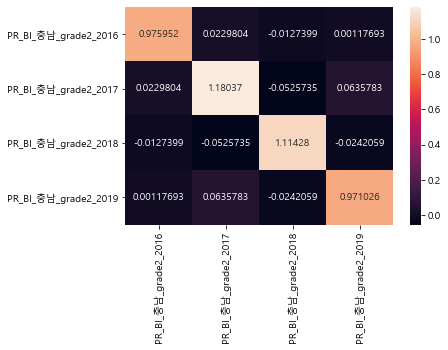

PR_BI 2016-2019 충남 grade3
[[ 0.86619832  0.02353447  0.04107775 -0.10738896]
 [ 0.02353447  1.10713188  0.08232316 -0.0139329 ]
 [ 0.04107775  0.08232316  0.85569136 -0.02263468]
 [-0.10738896 -0.0139329  -0.02263468  0.79372265]]


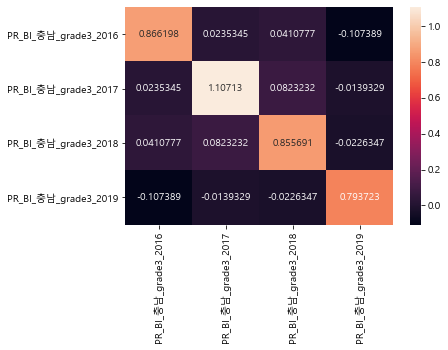

PR_BI 2016-2019 충남 grade4
[[ 1.0101811  -0.00597447 -0.00330813 -0.0852412 ]
 [-0.00597447  0.91007958  0.00126024  0.02376952]
 [-0.00330813  0.00126024  1.01727578  0.01260239]
 [-0.0852412   0.02376952  0.01260239  1.09598824]]


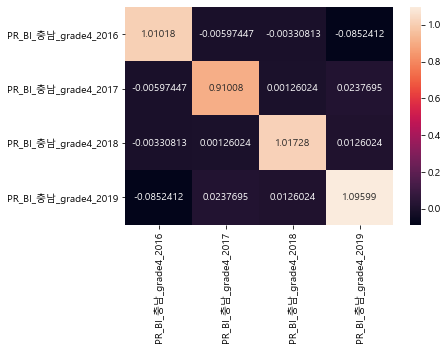

PR_BI 2016-2019 충남 grade5
[[ 1.04103859  0.08171827 -0.05435509  0.02405881]
 [ 0.08171827  1.01752432 -0.02996213  0.04551868]
 [-0.05435509 -0.02996213  0.97399198  0.02662063]
 [ 0.02405881  0.04551868  0.02662063  0.99168337]]


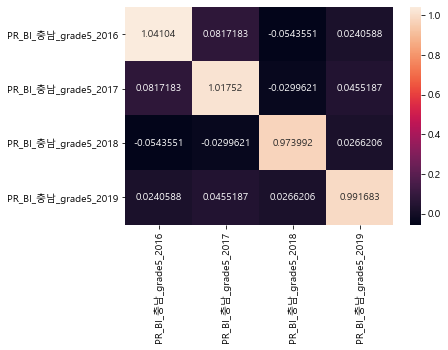

PR_BI 2016-2019 충남 grade6
[[ 1.12936707  0.01170803 -0.01688422  0.00300069]
 [ 0.01170803  1.03394526 -0.03725673  0.00111454]
 [-0.01688422 -0.03725673  0.85519011 -0.07390261]
 [ 0.00300069  0.00111454 -0.07390261  0.97959534]]


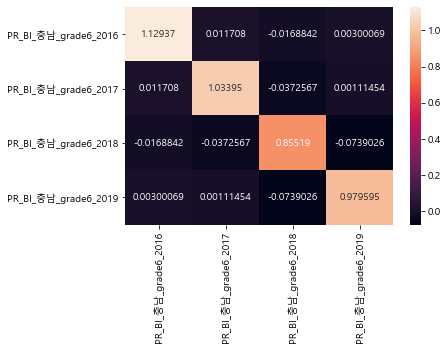

PR_BI 2016-2019 전북 grade1
[[ 1.00323832  0.06565444  0.03120806 -0.04835447]
 [ 0.06565444  0.82171878  0.07699858  0.02598001]
 [ 0.03120806  0.07699858  0.96087975  0.05654708]
 [-0.04835447  0.02598001  0.05654708  1.09320353]]


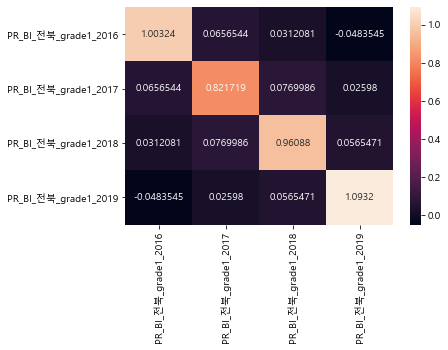

PR_BI 2016-2019 전북 grade2
[[ 0.91640137  0.08889555 -0.04205496  0.00523557]
 [ 0.08889555  0.94709215 -0.04441369  0.02719359]
 [-0.04205496 -0.04441369  0.79843751  0.01015073]
 [ 0.00523557  0.02719359  0.01015073  0.86609085]]


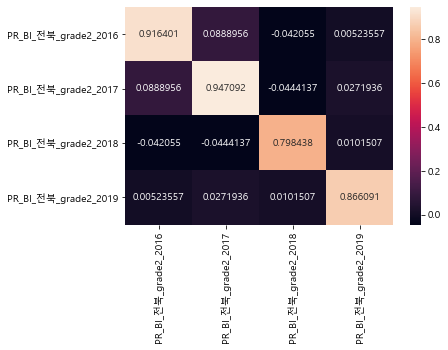

PR_BI 2016-2019 전북 grade3
[[ 1.04355072 -0.06912892 -0.00564673  0.06336403]
 [-0.06912892  0.90579039  0.00397386 -0.0142412 ]
 [-0.00564673  0.00397386  0.9443598  -0.07389258]
 [ 0.06336403 -0.0142412  -0.07389258  0.97754367]]


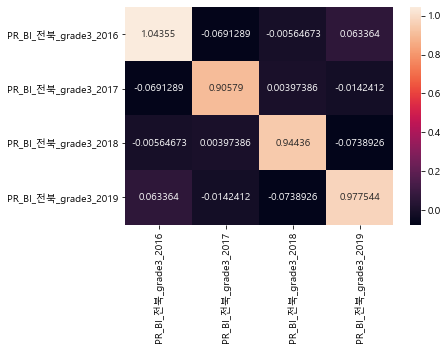

PR_BI 2016-2019 전북 grade4
[[ 0.91910272 -0.02144038  0.00613932  0.06479339]
 [-0.02144038  0.87324001  0.02094788 -0.00868949]
 [ 0.00613932  0.02094788  0.94903019 -0.00094451]
 [ 0.06479339 -0.00868949 -0.00094451  1.08014168]]


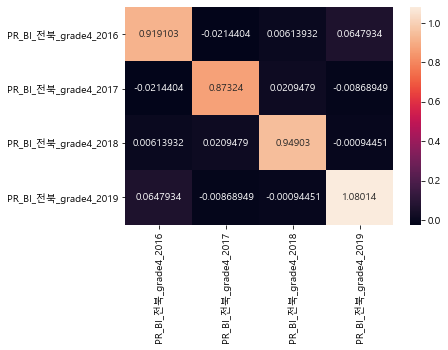

PR_BI 2016-2019 전북 grade5
[[ 1.01658172 -0.05940647  0.03951551 -0.02778222]
 [-0.05940647  1.15161525 -0.0017227  -0.04851972]
 [ 0.03951551 -0.0017227   1.06476992 -0.02646207]
 [-0.02778222 -0.04851972 -0.02646207  1.0977084 ]]


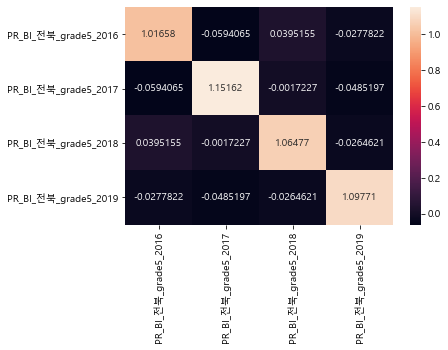

PR_BI 2016-2019 전북 grade6
[[ 0.94951345  0.00886418 -0.03518514  0.04298609]
 [ 0.00886418  0.92638221 -0.05964543  0.00405649]
 [-0.03518514 -0.05964543  0.95718727 -0.02695659]
 [ 0.04298609  0.00405649 -0.02695659  0.85391434]]


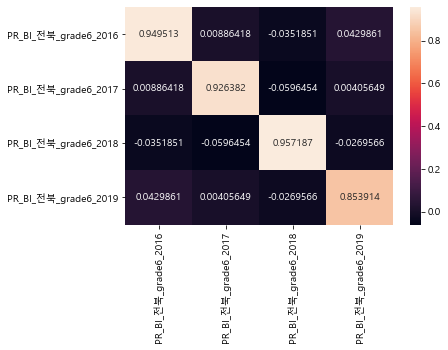

PR_BI 2016-2019 전남 grade1
[[ 0.97750639 -0.03545776 -0.00677257  0.0984729 ]
 [-0.03545776  0.88438776 -0.00039872 -0.068939  ]
 [-0.00677257 -0.00039872  0.89851391  0.09434328]
 [ 0.0984729  -0.068939    0.09434328  1.0200671 ]]


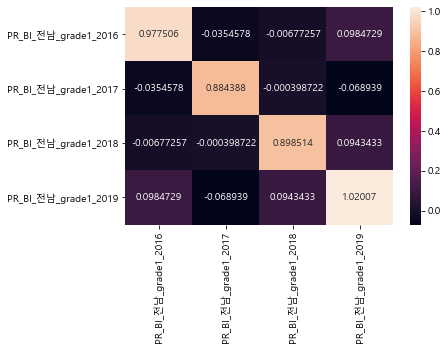

PR_BI 2016-2019 전남 grade2
[[ 0.86924622 -0.02656171 -0.00277603  0.04298961]
 [-0.02656171  0.87715402 -0.02401399 -0.01476746]
 [-0.00277603 -0.02401399  0.84172457  0.02365596]
 [ 0.04298961 -0.01476746  0.02365596  0.88414859]]


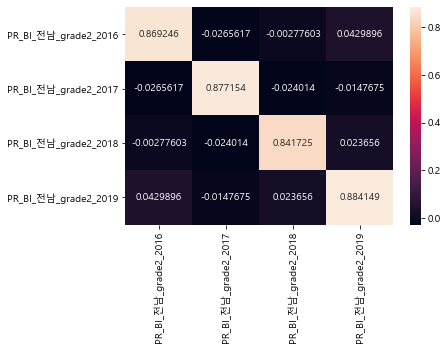

PR_BI 2016-2019 전남 grade3
[[ 0.90782541  0.01256309 -0.01914376  0.0173993 ]
 [ 0.01256309  0.92654688  0.01893261  0.00725432]
 [-0.01914376  0.01893261  0.95171831  0.0059221 ]
 [ 0.0173993   0.00725432  0.0059221   0.93499266]]


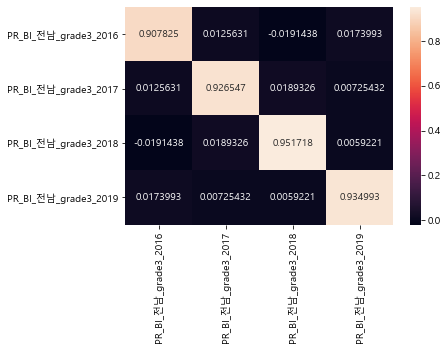

PR_BI 2016-2019 전남 grade4
[[ 1.03533453 -0.03423509 -0.08189617 -0.02336107]
 [-0.03423509  0.86937541 -0.01439703 -0.00459036]
 [-0.08189617 -0.01439703  0.95813304  0.10045823]
 [-0.02336107 -0.00459036  0.10045823  1.1470279 ]]


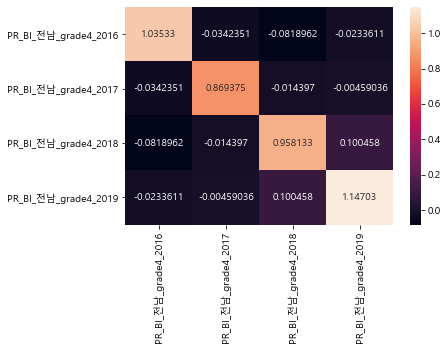

PR_BI 2016-2019 전남 grade5
[[ 0.87086393 -0.00730897  0.01498801 -0.00976732]
 [-0.00730897  0.82079817  0.03543461 -0.04000767]
 [ 0.01498801  0.03543461  0.85643103  0.02314286]
 [-0.00976732 -0.04000767  0.02314286  0.96026328]]


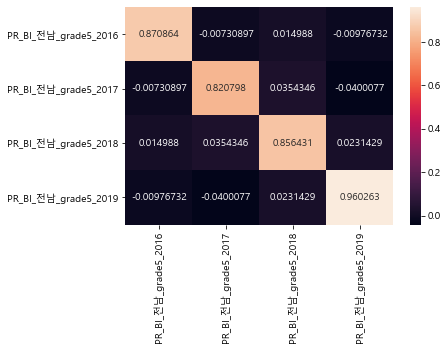

PR_BI 2016-2019 전남 grade6
[[ 0.8084327   0.02084628 -0.04457061 -0.02039495]
 [ 0.02084628  0.83119551 -0.03743434  0.00346675]
 [-0.04457061 -0.03743434  0.81951322  0.039691  ]
 [-0.02039495  0.00346675  0.039691    0.97592245]]


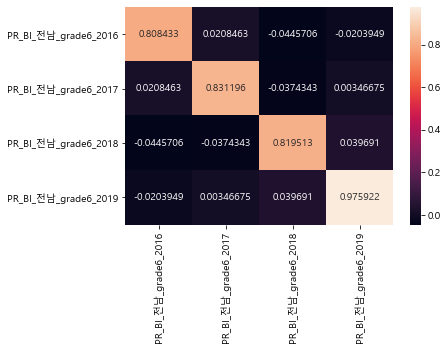

PR_BI 2016-2019 경북 grade1
[[ 0.87850158 -0.0717655  -0.03812132 -0.00754187]
 [-0.0717655   0.82955636  0.01612947  0.0301856 ]
 [-0.03812132  0.01612947  0.92730195 -0.00463558]
 [-0.00754187  0.0301856  -0.00463558  0.85421458]]


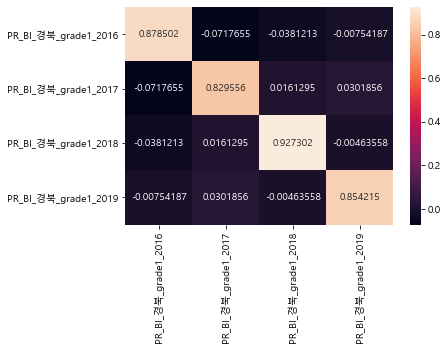

PR_BI 2016-2019 경북 grade2
[[0.88740523 0.0065057  0.03418482 0.04501059]
 [0.0065057  0.97542432 0.04263711 0.05478195]
 [0.03418482 0.04263711 0.96280992 0.04470323]
 [0.04501059 0.05478195 0.04470323 1.01223875]]


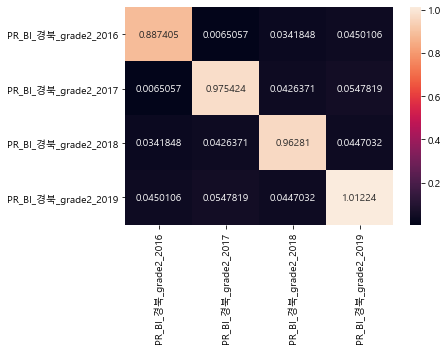

PR_BI 2016-2019 경북 grade3
[[ 0.85095475 -0.02854717 -0.00438882 -0.04388026]
 [-0.02854717  0.96274662 -0.0086824   0.02661863]
 [-0.00438882 -0.0086824   0.84846669  0.02343614]
 [-0.04388026  0.02661863  0.02343614  0.96552436]]


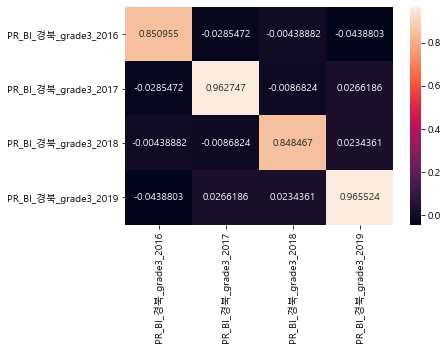

PR_BI 2016-2019 경북 grade4
[[ 1.02348815 -0.0672335   0.01683495 -0.01249867]
 [-0.0672335   1.05235413  0.02920608 -0.04755022]
 [ 0.01683495  0.02920608  0.93257945  0.08420023]
 [-0.01249867 -0.04755022  0.08420023  1.00234244]]


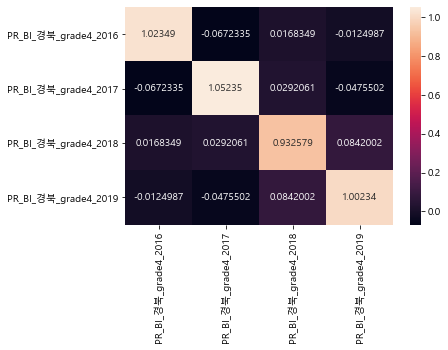

PR_BI 2016-2019 경북 grade5
[[ 0.8729729   0.05930619 -0.02301499  0.00706694]
 [ 0.05930619  0.84674458 -0.06736914 -0.00953326]
 [-0.02301499 -0.06736914  0.96767309  0.00349395]
 [ 0.00706694 -0.00953326  0.00349395  0.96881929]]


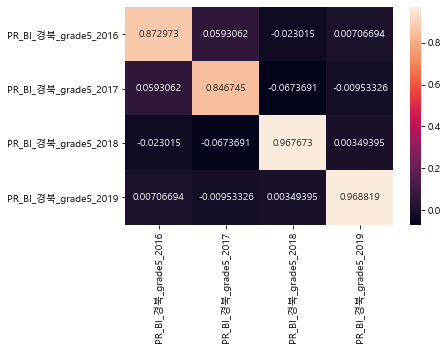

PR_BI 2016-2019 경북 grade6
[[ 0.92805914  0.03242932 -0.00011224  0.02892001]
 [ 0.03242932  0.94670563  0.06543479  0.0119758 ]
 [-0.00011224  0.06543479  1.0038348  -0.03194295]
 [ 0.02892001  0.0119758  -0.03194295  0.82637894]]


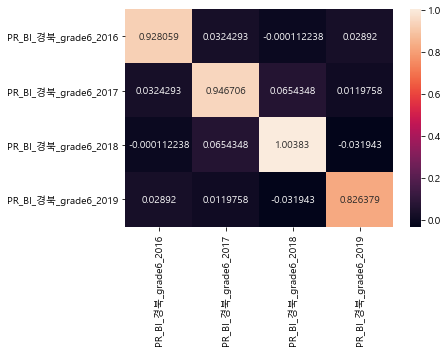

PR_BI 2016-2019 경남 grade1
[[ 0.88768943 -0.01567287  0.00350324  0.01733276]
 [-0.01567287  0.76810446 -0.014211   -0.01008165]
 [ 0.00350324 -0.014211    0.80116542  0.02512551]
 [ 0.01733276 -0.01008165  0.02512551  0.89577048]]


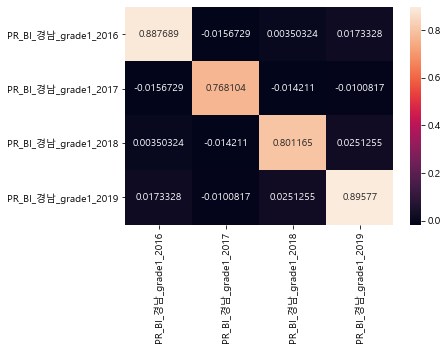

PR_BI 2016-2019 경남 grade2
[[ 0.9354487   0.01388284 -0.03562021  0.00250804]
 [ 0.01388284  0.88393021 -0.0013997   0.00899892]
 [-0.03562021 -0.0013997   0.90341785  0.06806256]
 [ 0.00250804  0.00899892  0.06806256  0.91728266]]


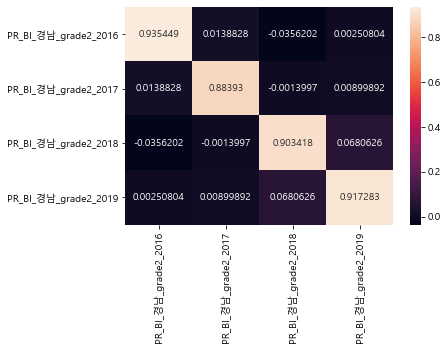

PR_BI 2016-2019 경남 grade3
[[ 0.84705408 -0.0245679  -0.0088489  -0.01940074]
 [-0.0245679   0.87251058  0.01449883 -0.01897898]
 [-0.0088489   0.01449883  0.9263971  -0.04017549]
 [-0.01940074 -0.01897898 -0.04017549  0.9423787 ]]


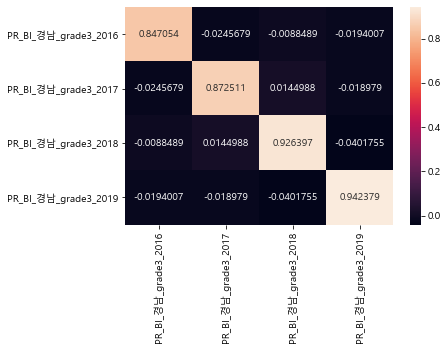

PR_BI 2016-2019 경남 grade4
[[ 0.97364599 -0.02015049  0.05537585 -0.00042662]
 [-0.02015049  0.88466944  0.0446899  -0.00435094]
 [ 0.05537585  0.0446899   0.93186062  0.02325663]
 [-0.00042662 -0.00435094  0.02325663  0.8801987 ]]


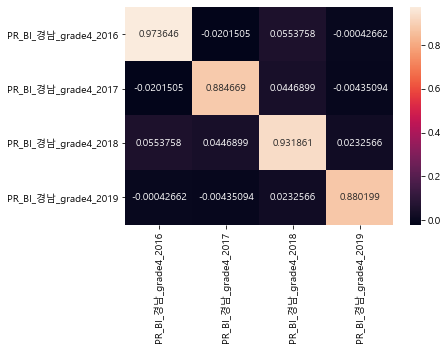

PR_BI 2016-2019 경남 grade5
[[ 0.89539569  0.04004272 -0.03971242 -0.04049412]
 [ 0.04004272  0.91828144 -0.01620279 -0.05027084]
 [-0.03971242 -0.01620279  0.84473584  0.02708416]
 [-0.04049412 -0.05027084  0.02708416  0.84766812]]


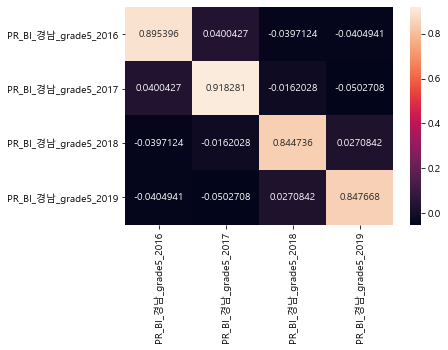

PR_BI 2016-2019 경남 grade6
[[ 0.85750442  0.02718728 -0.01402596 -0.037414  ]
 [ 0.02718728  0.94825656 -0.03653792 -0.00760133]
 [-0.01402596 -0.03653792  0.94122497  0.00563443]
 [-0.037414   -0.00760133  0.00563443  0.90721224]]


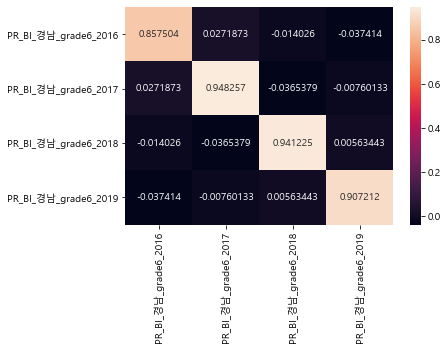

PR_BI 2016-2019 제주 grade1
[[ 1.03889284 -0.03252937  0.06136525 -0.00894446]
 [-0.03252937  0.82295746  0.09218138  0.04937255]
 [ 0.06136525  0.09218138  1.05061855 -0.08234692]
 [-0.00894446  0.04937255 -0.08234692  0.97390085]]


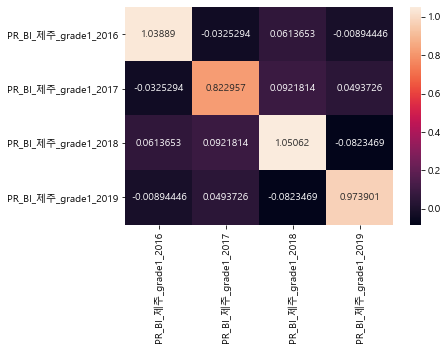

PR_BI 2016-2019 제주 grade2
[[ 1.02754398 -0.01108913 -0.02194681  0.04923828]
 [-0.01108913  0.98158825 -0.00284067 -0.026555  ]
 [-0.02194681 -0.00284067  0.91804141  0.09401566]
 [ 0.04923828 -0.026555    0.09401566  0.96986786]]


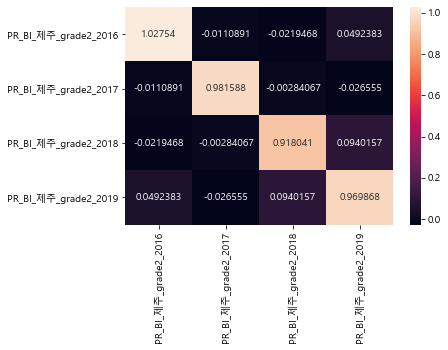

PR_BI 2016-2019 제주 grade3
[[ 0.99040773  0.03440855  0.08882581 -0.01941347]
 [ 0.03440855  0.90116985 -0.01236235 -0.00336531]
 [ 0.08882581 -0.01236235  0.88697603 -0.00586067]
 [-0.01941347 -0.00336531 -0.00586067  0.85794739]]


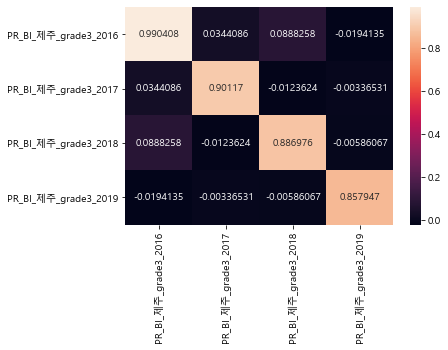

PR_BI 2016-2019 제주 grade4
[[ 1.04752834  0.03750567  0.05736961 -0.06099773]
 [ 0.03750567  0.96997732 -0.00566893  0.09160998]
 [ 0.05736961 -0.00566893  0.95657596 -0.06417234]
 [-0.06099773  0.09160998 -0.06417234  1.20997732]]


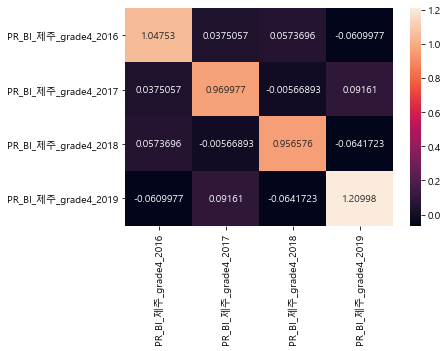

PR_BI 2016-2019 제주 grade5
[[ 0.95796022 -0.10524083  0.02446036 -0.03482892]
 [-0.10524083  0.95805448  0.00447733 -0.04199265]
 [ 0.02446036  0.00447733  1.0666651   0.17209445]
 [-0.03482892 -0.04199265  0.17209445  0.97193421]]


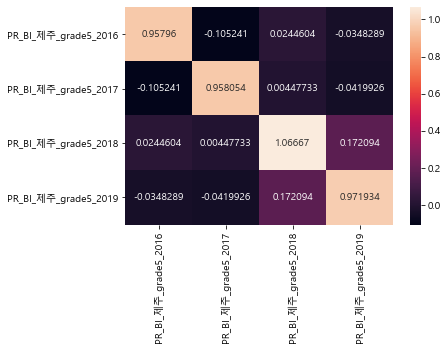

PR_BI 2016-2019 제주 grade6
[[ 1.09628099 -0.19028926  0.13409091 -0.01508264]
 [-0.19028926  1.16716942  0.03522727  0.00357438]
 [ 0.13409091  0.03522727  1.00568182 -0.05340909]
 [-0.01508264  0.00357438 -0.05340909  0.81196281]]


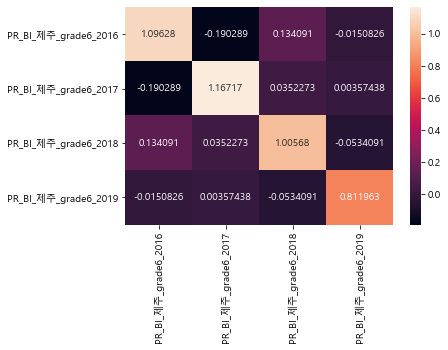

PR_BI 2016-2019 세종 grade1
[[ 0.79986939  0.02390204  0.06106122  0.11862857]
 [ 0.02390204  0.87164082 -0.02563265  0.10811429]
 [ 0.06106122 -0.02563265  0.85387755  0.12685714]
 [ 0.11862857  0.10811429  0.12685714  0.93988571]]


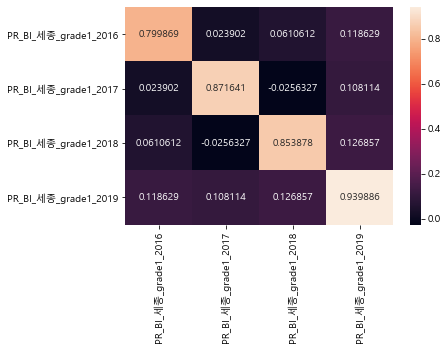

PR_BI 2016-2019 세종 grade2
[[ 1.20125654 -0.04499072 -0.05148423 -0.0188902 ]
 [-0.04499072  0.8325603   0.00139147  0.04545455]
 [-0.05148423  0.00139147  0.6377551  -0.07792208]
 [-0.0188902   0.04545455 -0.07792208  0.91381346]]


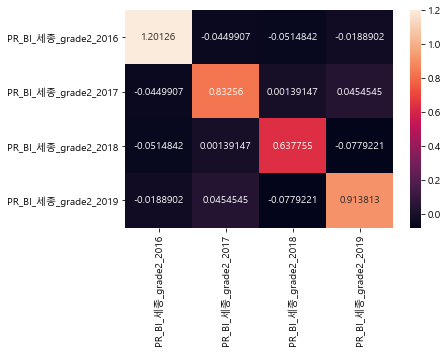

PR_BI 2016-2019 세종 grade3
[[ 0.94387755  0.10884354  0.10289116  0.01445578]
 [ 0.10884354  0.96935232  0.08939201 -0.04460743]
 [ 0.10289116  0.08939201  0.89593963 -0.00393282]
 [ 0.01445578 -0.04460743 -0.00393282  0.93618906]]


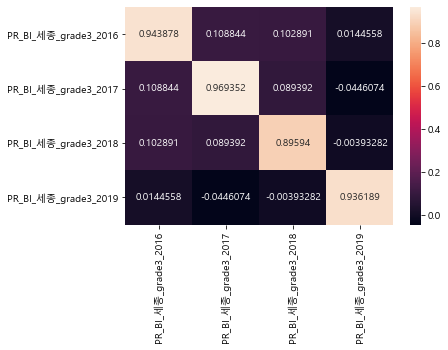

PR_BI 2016-2019 세종 grade4
[[ 0.94796261 -0.02872296 -0.06611006  0.03360639]
 [-0.02872296  0.9347301  -0.02011132 -0.00672128]
 [-0.06611006 -0.02011132  0.797364    0.06343205]
 [ 0.03360639 -0.00672128  0.06343205  0.87880697]]


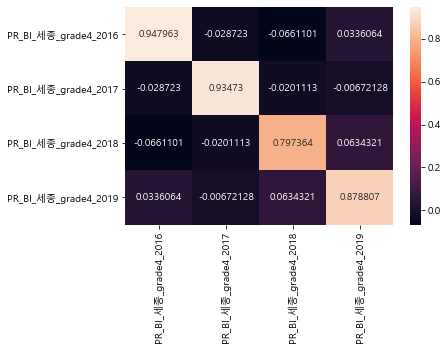

PR_BI 2016-2019 세종 grade5
[[ 1.11361863  0.03037201 -0.02601457 -0.11778096]
 [ 0.03037201  0.78063215  0.20421436 -0.01060094]
 [-0.02601457  0.20421436  1.0119667  -0.00884495]
 [-0.11778096 -0.01060094 -0.00884495  0.87636576]]


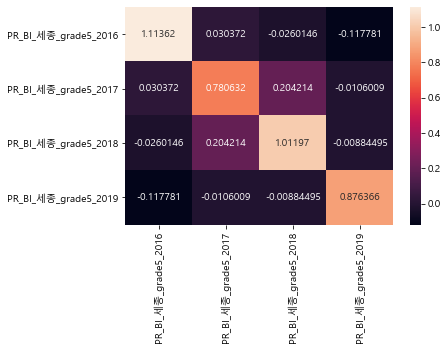

PR_BI 2016-2019 세종 grade6
[[ 0.68184877 -0.05263703 -0.0163035   0.14440246]
 [-0.05263703  1.11257181  0.01143833 -0.010869  ]
 [-0.0163035   0.01143833  1.19683246 -0.02189328]
 [ 0.14440246 -0.010869   -0.02189328  1.03255525]]


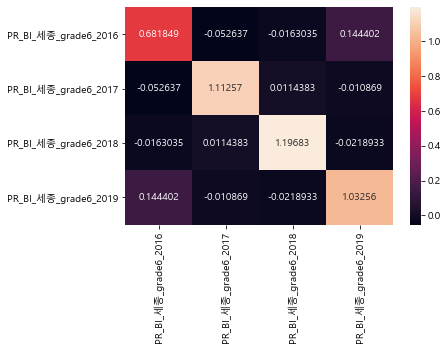

In [36]:
# PR_BI, 2016-2019

grade_ = [1, 2, 3, 4, 5, 6]
city_ = df_PRBI['CITY'].unique().tolist()

for city in city_: 
    for grade in grade_: 
        cov_matrix_heatmap(df_PRBI, 'PR_BI', 2016, 2019, grade, city)